 <font size="6">Автоэнкодеры</font>

# Автоэнкодер (AE)

## Unsupervised learning 

## Representation learning

Одной из областей, тесно связанной с Unsupervised learning, является задача выучивания представления данных (**representation learning**).

Выученное представление используется либо как шаг предобучения нейросети перед обучением ее уже на целевую задачу, либо как источник признаков для других, не обязательно нейросевых, алгоритмов. 

Задачу получения полезного представления данных можно решать при помощи supervised learning, однако, как правило, это куда менее эффективно. Почему?

ImageNet содержит 1.28 миллионов изображений. Допустим даже мы передаем их в сетку, приводя все к разрешение 128x128. В этом случае они будует занимать $\approx$ 500Гбит. 

А сколько будут занимать метки изображений? У нас 1000 возможных классов. Допустим, мы используем one-hot encoding в виде битового вектора. Получается $\approx$ 12.8Мбит.

Нейронная сеть для ImageNet может легко содержать 30М весов.

Есть ли смысл нейросетке учить информации больше, чем закодировано в **предсказываемой величине**? — Нет. Потому, как правило, представление данных, полученное из полностью supervised нейросети, будет крайне бедным и заточенным на конкретную задачу. Могут возникнуть проблемы даже с применением этого представления для похожей задачи. 

А вот если мы воспользуемся unsupervised подходом, то потенциально можем принудить нейросетку пытаться выработать эффективное представление всех 500Гбит.

## Снижение размерности

Еще одной областью, тесно связанной с предыдущими двумя, является задача снижения размерности — когда мы хотим данные из пространства высокой размерности преобразовать в пространство более низкой, с сохранением одного или нескольких свойств, например:

* данные реконструируются обратно почти без ошибки;
* расстояние между объектами сохраняется.

Зачем это нужно? По многим причинам.

Многие алгоритмы показывают себя плохо на простанствах большой размерности в принципе ([проклятье размерности](https://en.wikipedia.org/wiki/Curse_of_dimensionality)). 

Некоторые — просто будут значительно дольше работать, при этом качество их работы не изменится от уменьшения размерности. 

Понижение размерности позволяет использовать память более эффективно и подавать модели на обучение за один раз больше объектов. 

Также понижение размерности помогает избавится от шума, как мы обсудим дальше.

## Архитектура автоэнкодера

Автоэнкодер — архитектура нейросети, которая сначала с помощью нейросети-энкодера сжимает изображение в вектор небольшой размерности (он называется скрытым представлением), а затем восстанавливает этот вектор в исходную картинку с помощью нейросети-декодера.

Практика показывает, что скрытое представление картинки позволяет делать очень интересные и красивые вещи — например, очищать изображение от шума, проводить гладкую интерполяцию между 2 написанными от руки цифрами, генерировать новую рукописную цифру со стилем от имеющейся.

Откуда берутся эти свойства? Они являются следствием сжатия информации. Одна из форм сжатия — это классификация, которую мы уже делали. Если это цифры, то вместо изображения можно сохранить только какая это цифра. Это предельное сжатие информации, но при попытке перевести цифру в картинку мы уже не имеем достаточно информации, чтобы картинка получалось разной. Если не так сильно ограничивать информацию в точке максимального сжатия, то кроме класса цифры сохранится еще что-то и изображение удастся восстановить с большим количеством сохранённых деталей.

<img src="https://edunet.kea.su/repo/EduNet-content/L14/img_license/autoencoder_architecture.png" alt="alttext" width="400">

## Сжатие информации и потери

Автоэнкодер может быть без потерь и с потерями (lossless и lossy). В какой-то степени это альтернативно методам сжатия архиваторов и кодирования контента (zip, mp3, jpeg, flac, ...). Можно ли сделать сжатие на нейронных сетях с помощью автоэнкодеров? Да, это будет работать. Размер сети будет большим, но сжатие может превзойти другие алгоритмы. Практический пример [проект Google Lyra](https://ai.googleblog.com/2021/02/lyra-new-very-low-bitrate-codec-for.html), в котором подобный подход был применен для компрессии звука и проект [NVIDIA Maxine](https://developer.nvidia.com/maxine), где в свою очередь сжимают видео.

Почему это может работь? Дело в том, что нейронная сеть может сформулировать набор правил, по которому на основе латентного представления приближенно или точно кодировать (за счет кодировщика), а затем восстанавливать исходный объект (при помощи декодировщика).

<img src="https://edunet.kea.su/repo/EduNet-content/L14/img_license/original_space_to_latent_space.png" alt="alttext" width="600">

А почему мы уверены, что такой набор правил будет существовать и мы вообще имеем право понижать размерность пространства?

## Manifold assumption 

Мы предполагаем, что наши данные на самом деле лежат в пространстве меньшем, чем пространство исходных признаков.

<img src="https://edunet.kea.su/repo/EduNet-content/L14/img_license/manifold_assumption.png" alt="alttext" width="500">

В большинстве случаев это действительно так. Например, лица людей даже на фотографиях 300x300, очевидно, лежат в пространстве меньшей размерности, нежели 90000. Ведь не каждая матрица 300 на 300, заполненная какими-то значениями от 0 до 1, даст нам изображение человека.

<img src="https://edunet.kea.su/repo/EduNet-content/L14/img_license/manifold_assumption_faces_example.png" alt="alttext" width="700">

## Метод главных компонент (PCA)

Метод главных компонент (Principal Component Analysis) - это метод отображения векторов свойств объектов (помним, что у нас объект всегда описывается вектором свойств, длина вектора — это количество свойств) в вектора производных свойств (**компонент**), меньшей длины с помощью линейной комбинации, чтобы обратной операцией можно было восстановить значения векторов свойств как можно ближе к исходным. То есть PCA тоже выполняет сжатие информации, он тоже работает для группы объектов (а нейронная сеть автоэнкодера учится под определённую группу объектов).

Обычно PCA работает для центрированных переменных. Каждая следующая компонента проводится перпендикулярно предыдущим и так, чтобы объяснить наибольшую часть разницы, не объясненной предыдущими компонентами между объектами.

<img src="https://edunet.kea.su/repo/EduNet-content/L14/img_license/principal_component_analysis.png" alt="alttext" width="500">

Графически можно представить PCA, как поиск подпространства, проекция точек, на которое минимально меняет координаты в исходном пространстве. Например, для объектов на плоскости PCA можно сделать в одномерное пространство — на прямую.

Прямая определяется только вектором нормали, то есть линия проекции проходит через 0. 

Возвращаясь к примеру с лицами — долгое время для распознавания лиц размерности 128\*128 использовалось представление, полученное при помощи PCA. Для хорошего качества восстановления хватает около 100 компонент.

## Аналогия AE и PCA

Отличия PCA и AE в том, что PCA выполняет линейную комбинацию над компонентами исходного вектора свойств объекта, а AE — как правило, нелинейную. PCA вычисляется однозначно, а AE обучается без гарантии нахождения наилучшего положения. PCA гарантирует ортогональный базис для разложения сжатых свойств, а AE — нет.

PCA будет частным случаем AE, если в нём сделать только один плотный слой (Dense) с количеством нейронов, равным требуемому числу компонент, сделать линейную функцию активации, сделать потери по среднему квадрату ошибки (mean squared error — MSE). Кроме этого, необходимо будет нормировать признаки перед подачей их на вход AE.

<img src="https://edunet.kea.su/repo/EduNet-content/L14/img_license/pca_autoencoder.png" alt="alttext" width="500">

Тогда PCA позволяет рассчитать веса для нейронов такого автоэнкодера. При этом гарантировав (в отличии от градиентного спуска) наилучшее решение задачи.

## Очищение изображения от шумов

Интересное применение автоэнкодеров — очищение входной картинки от шумов. Такое принципиально возможно из-за того, что размерность латентного пространства очень мала по сравнению с размерностью входного пространства(в нашем случае — 32 и 784 соответственно) — в нём попросту нет места случайному шуму, но зато есть место для общих закономерностей из входного пространства.

То есть мы подаём на обучении автоэнкодера такой незашумлённый датасет, что в нём на самом деле есть некое простраство свойств, которое его описывает. На выходе энкодера в изображении останутся именно эти свойства. Шум является внешним свойством и не сможет закодироваться.

Иными словами — за счет кодировщика и декодировщика автоэнкодер выучивается «проектировать» объекты на латентное пространство и восстанавливать их из него. Если шум небольшой, то автоэнкодер спроецирует объект в нужное место в латентном пространстве и обратно восстановит его уже без шума.

<img src="https://edunet.kea.su/repo/EduNet-content/L14/img_license/autoencoder_clean_noise.png" alt="alttext" width="700">

При этом важно понимать, что если шум поместит наш объект так, что автоэнкодеру придется выбирать между разными вариантами проекции, могут возникнуть артефакты. 

В случае, приведенном на рисунке, зашумленному x соответствуют две группы объектов из реального датасета. Если мы, к примеру, оптимизируем MSE, то автоэнкодеру «экономнее» всего будет восстанавливать нечто между двумя группами. При этом этого «нечто» в природе не существует или оно очень маловероятно. 

<img src="https://edunet.kea.su/repo/EduNet-content/L14/img_license/reconstructed_between_2_distribution.png" alt="alttext" width="400">

### Добавление шума к исходной выборке

Также в случае отсутствия шума в изначальной выборке, ее малом размере и т.д. можно добавлять шум к самим исходным данным, получая из объекта $x$ объект $\tilde{x}$, и требуя от энкодера восстановить на основе зашумленного объекта исходный.

<img src="https://edunet.kea.su/repo/EduNet-content/L14/img_license/denoising_autoencoder.png" alt="alttext" width="350">

Этот подход может работать и является примером *аугментации данных*. Он может дополнительно заставить автоэнкодер выучивать полезные признаки, т.е. его можно использовать, даже если целью не является получение автоэнкодера, избавляющего данные от шума.

С ним, однако, надо быть очень аккуратным:

1. Шум, который вы добавляете, не должен сильно менять исходный объект. Если это происходит, то либо автоэнкодер легко будет находить места, где был добавлен шум и при этом делать ему это будет легче, чем учить сжатое представление данных. Либо автоэнкодер выучит о ваших данных что-то такое, чего там и в помине быть не может. К примеру, если добавить к признакам, которые всегда целые, нормальный шум, ничего хорошего не выйдет. 


2. Шум должен соответствовать «естественному шуму». Если реальный шум в данных отличается от того, на котором учился автоэнкодер, есть вероятность, что он не будет очищать данные от исходного шума.

## PCA для избавления от шума

Давайте применим PCA, как простеший автоэнкодер, для очищения от шумов изображений MNIST.

In [ ]:
import torchvision.datasets as dset
import torchvision
import matplotlib.pyplot as plt
from IPython.display import clear_output 

root = "./data"

train_set = dset.MNIST(
    root=root, train=True, transform=torchvision.transforms.ToTensor(), download=True
)
test_set = dset.MNIST(
    root=root, train=False, transform=torchvision.transforms.ToTensor(), download=True
)
clear_output()

In [ ]:
X_train = train_set.data.numpy()
Y_train = train_set.targets.numpy()
X_test = test_set.data.numpy()
Y_test = test_set.targets.numpy()

X_train, X_test = X_train / 255.0, X_test / 255.0 # normalize data from 0 to 1
xt_shape = X_train.shape
print("Initial shape ", xt_shape)
xt_flat = X_train.reshape(-1 , xt_shape[1] * xt_shape[2]) #  reshape to vector, 28*28 = 784
print("Reshaped to ", xt_flat.shape)

Initial shape  (60000, 28, 28)
Reshaped to  (60000, 784)


Теперь заведём класс PCA и настроим его, чтобы сохранял 90% информации об исходной картинке. Обучим его и посмотрим, сколько ему потребовалось признаков для описания каждой картинки.

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(0.90)
xt_encoded = pca.fit_transform(xt_flat)
print("Encoded features ", pca.n_components_)

Encoded features  87


Энкодер (он же декодер, ведь это просто обратная матрица от энкодера PCA) обучен. Теперь можно проверить, как он закодирует и раскодирует тестовую выборку. Для этого проведём такие же преобразования размерности для неё.

In [ ]:
xtest_shape = X_test.shape
xtest_flat = X_test.reshape(-1, xtest_shape[1] * xtest_shape[2])
xtest_encoded = pca.transform(xtest_flat)
xtest_decoded = pca.inverse_transform(xtest_encoded).reshape(xtest_shape)
print("Decoded xtest_decoded shape is ", xtest_decoded.shape)

Decoded xtest_decoded shape is  (10000, 28, 28)


Теперь нужно определить функцию для отрисовки изображений MNIST. Она будет выводить несколько изображений в ряд, поэтому будет принимать трёхмерный массив.

In [ ]:
def plot_imgs(imgs, title):
    fig = plt.figure(figsize=(16, 3))
    columns = imgs.shape[0]
    rows = 1
    for i in range(columns):
        fig.add_subplot(rows, columns, i + 1)
        plt.imshow(imgs[i], cmap="gray_r", clim=(0, 1))
    fig.suptitle(title)
    plt.show()

Выведем исходное и закодированное изображение для некоторых изображений.

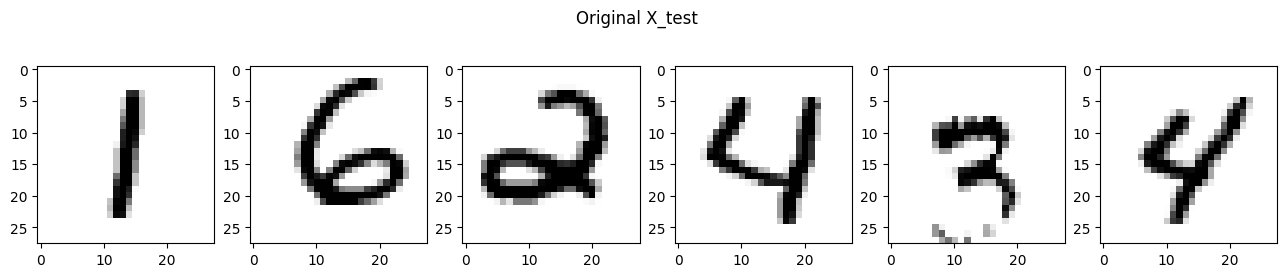

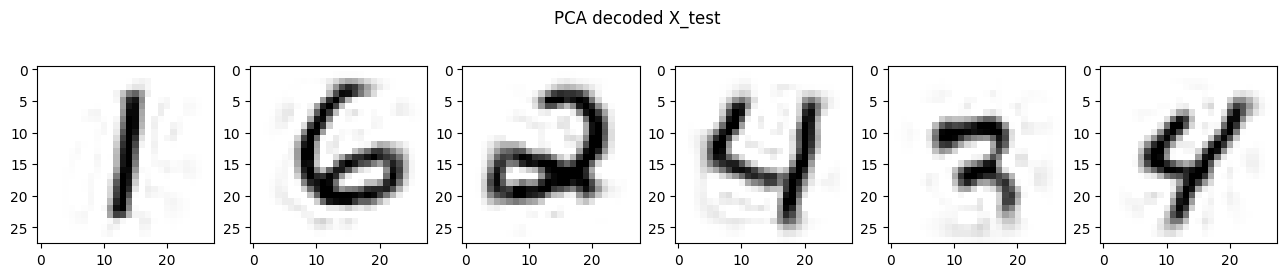

In [ ]:
import numpy as np

np.random.seed(42)
sample_indices = np.random.choice(X_test.shape[0], 6) 
samples_orig = X_test[sample_indices]
samples_decoded = xtest_decoded[sample_indices]
plot_imgs(samples_orig, "Original X_test")
plot_imgs(samples_decoded, "PCA decoded X_test")

Видно, что `pca.n_components_` (87 для 90% PCA) достаточно для описания картинок MNIST вместо 784 исходных пикселей. Но при этом нужно хранить матрицу кодирования-декодирования, а также изображения получаются немного зашумлёнными. Мы получили способ сжатия с потерями для рукописных цифр.

Степень сжатия у нас примерно 87/784 ~= 0.11.

Теперь посмотрим, как наш автоэнкодер без нейросетей справится с очисткой от зашумления. Для этого сделаем функцию добавления шумов к MNIST выборке и посмотрим результат.

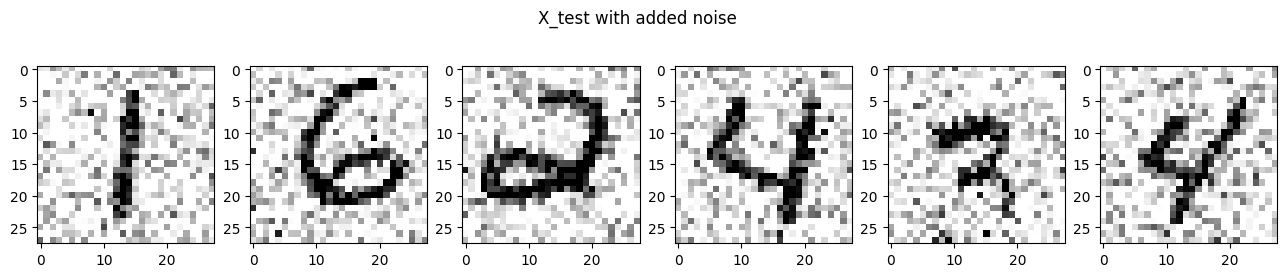

In [ ]:
np.random.seed(42)
def mnist_add_noise(noise_factor, dataset):
    return dataset + noise_factor * np.random.normal(
        loc=0.0, scale=1.0, size=dataset.shape
    )


X_test_noisy = mnist_add_noise(0.3, X_test)
samples_noisy = X_test_noisy[sample_indices]
plot_imgs(samples_noisy, "X_test with added noise")

Теперь нужно провести ту же операцию PCA энкодера и декодера, что выше.

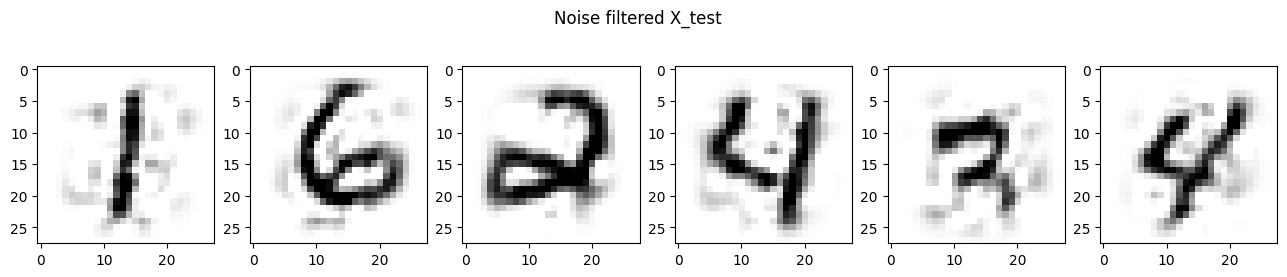

In [ ]:
def PCArecode(dataset):
    dataset_flat = dataset.reshape(-1, dataset.shape[1] * dataset.shape[2])
    return pca.inverse_transform(pca.transform(dataset_flat)).reshape(dataset.shape)

X_filtered = PCArecode(X_test_noisy)
samples_filtered = X_filtered[sample_indices]
plot_imgs(samples_filtered, "Noise filtered X_test")

Для простоты сравнения напишем функцию, которая будет строить зашумленные и восстановленные изображения друг под другом.

In [ ]:
def plot_digits(*args, invert_colors=True, digit_size=28, name=None):
    args = [x.squeeze() for x in args]
    n = min([x.shape[0] for x in args])
    figure = np.zeros((digit_size * len(args), digit_size * n))

    for i in range(n):
        for j in range(len(args)):
            figure[
                j * digit_size : (j + 1) * digit_size,
                i * digit_size : (i + 1) * digit_size,
            ] = args[j][i].squeeze()

    if invert_colors:
        figure = 1 - figure

    plt.figure(figsize=(2 * n, 2 * len(args)))

    plt.imshow(figure, cmap="Greys_r", clim=(0, 1))

    plt.grid(False)
    ax = plt.gca()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    if name is not None:
        plt.savefig(name)
    plt.show()

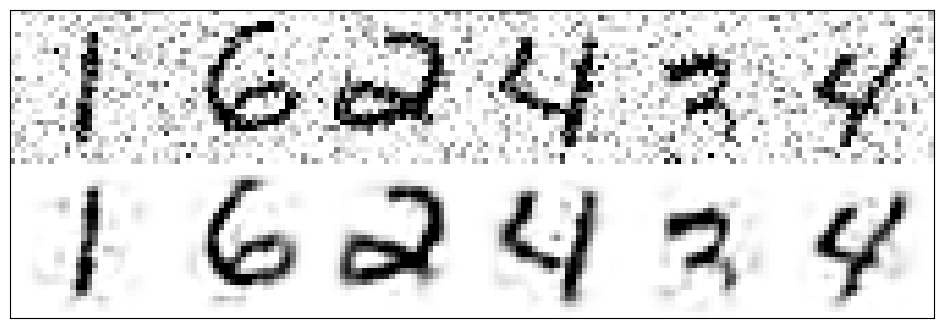

In [ ]:
plot_digits(samples_noisy, samples_filtered)

### Латентное представление цифр после PCA 

Посмотрим теперь на то, как делятся наши картинки в латентном представлении.

In [ ]:
def pca_latent(dataset):
    dataset_flat = dataset.reshape(-1, dataset.shape[1] * dataset.shape[2])
    return pca.transform(dataset_flat)


def plot_manifold(latent_r, labels=None, alpha=0.9,title=None):
    plt.figure(figsize=(10, 10))
    if labels is None:
        plt.scatter(latent_r[:, 0], latent_r[:, 1], cmap="tab10", alpha=alpha)
        if title:
          plt.title(title)
    else:
        plt.scatter(latent_r[:, 0], latent_r[:, 1], c=labels, cmap="tab10", alpha=alpha)
        plt.colorbar()
        if title:
          plt.title(title)
    plt.show()

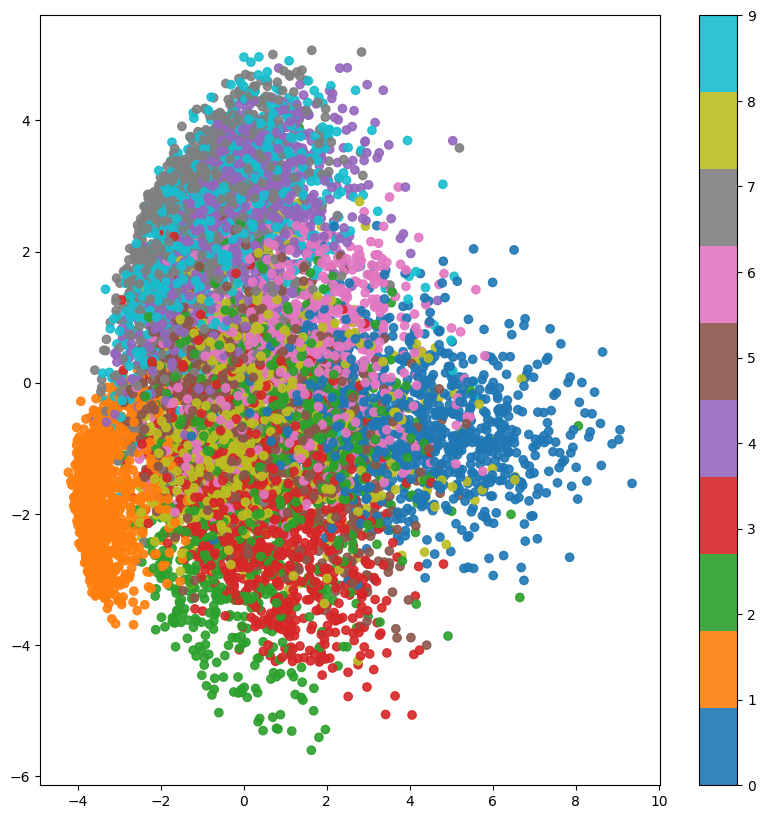

In [ ]:
latent_r = pca_latent(X_test)
plot_manifold(latent_r, Y_test)

Видим, что латентное представление слабо разделяет картинки по тому, какие цифры на них изображены.

## Реализация автоэнкодера

Итак, вспомним, что в автоэнкодере одна сеть переводит пространство признаков в пространство меньшей размерности, а другая сеть восстанавливает исходное изображение. Вместо вычисления коэффициентов сети мы будем её обучать. Для обучения нужно определить функцию потерь. Обычно используют среднеквадратичное расстояние (MSE). То есть мы требуем, чтобы значения пикселей исходного изображения и восстановленного отличались несильно. Также можно использовать Binary Cross Etropy.

<img src="https://edunet.kea.su/repo/EduNet-content/L14/img_license/nn_encoder_nn_decoder.png" alt="alttext" width="700">

Мы можем использовать любую сеть для энкодера и декодера: на линейных слоях или на свёрточных.

Теперь нужно задать архитектуру модели. Мы будем использовать свёрточную  архитектуру. В конце кодировщика должен быть вектор длины `latent_size`. Декодировщик должен принимать этот вектор и восстанавливать до целого изображения.

In [ ]:
import torch.nn as nn

class Encoder(nn.Module):
    def __init__(self, latent_dim):
        super().__init__()
        self.latent_dim = latent_dim # latent space size
        hidden_dims = [32, 64, 128, 256, 512] # num of filters in layers
        modules = []
        in_channels = 1 # initial value of channels
        for h_dim in hidden_dims[:-1]: # conv layers
            modules.append(
                nn.Sequential(
                    nn.Conv2d(                    
                        in_channels=in_channels, # num of input channels 
                        out_channels=h_dim, # num of output channels 
                        kernel_size=3, 
                        stride=2, # convolution kernel step
                        padding=1, # save shape 
                    ),
                    nn.BatchNorm2d(h_dim),  
                    nn.LeakyReLU(), 
                )
            )
            in_channels = h_dim # changing number of input channels for next iteration

        modules.append(
            nn.Sequential(
                nn.Conv2d(in_channels=256, out_channels=512, kernel_size=1), # changing the kernel size, because  size of the array (2*2)
                nn.BatchNorm2d(512),
                nn.LeakyReLU(),
            )
        )
        modules.append(nn.Flatten()) # to vector, size 512 * 2*2 = 2048
        modules.append(nn.Linear(512 * 2*2, latent_dim)) 

        self.encoder = nn.Sequential(*modules)

    def forward(self, x):
        x = self.encoder(x)
        return x


class Decoder(nn.Module):
    def __init__(self, latent_dim):
        super().__init__()

        hidden_dims = [512, 256, 128, 64, 32] # num of filters in layers
        self.linear = nn.Linear(in_features=latent_dim, out_features = 512) 

        modules = []
        for i in range(len(hidden_dims) - 1): # define ConvTransopse layers
            modules.append(
                nn.Sequential(
                    nn.ConvTranspose2d(
                        in_channels = hidden_dims[i],
                        out_channels = hidden_dims[i + 1],
                        kernel_size=3,
                        stride=2,
                        padding=1,
                        output_padding=1,
                    ),
                    nn.BatchNorm2d(hidden_dims[i + 1]),
                    nn.LeakyReLU(),
                )
            )

        modules.append(
            nn.Sequential(
                nn.ConvTranspose2d(
                    in_channels = hidden_dims[-1],
                    out_channels = hidden_dims[-1],
                    kernel_size=3,
                    stride=2,
                    padding=1,
                    output_padding=1,
                ),
                nn.BatchNorm2d(hidden_dims[-1]),
                nn.LeakyReLU(),
                nn.Conv2d(in_channels = hidden_dims[-1], out_channels=1, kernel_size=7, padding=1),
                nn.Sigmoid(),
            )
        )

        self.decoder = nn.Sequential(*modules)

    def forward(self, x):
        x = self.linear(x) # from latents space to Linear 
        x = x.view(-1, 512, 1, 1) # reshape
        x = self.decoder(x) # reconstruction
        return x

Напишем основную функцию для обучения сети. single_pass_handler и loss_handler будут меняться в зависимости от модели, которую мы обучаем.

In [ ]:
import torch.nn.functional as F

def train(
    enc,
    dec,
    loader,
    optimizer,
    single_pass_handler,
    loss_handler,
    epoch,
    log_interval=500,
):
    '''
    Function to train model, parameters: 
    enc - encoder
    dec - decoder
    loader - loader of data
    optimizer - optimizer
    single_pass_handler - return reconstructed image, use for loss 
    loss_handler - loss function 
    epoch - num of epochs
    log_interval - output interval
    '''

    for batch_idx, (data, lab) in enumerate(loader): 
        batch_size = data.size(0)
        optimizer.zero_grad()
        data = data.to(device)
        lab = lab.to(device)

        latent, output = single_pass_handler(encoder, decoder, data, lab) # reconstructed image drom decoder 

        loss = loss_handler(data, output, latent) # compute loss
        loss.backward()
        optimizer.step()
        if batch_idx % log_interval == 0:
            print(
                "Train Epoch: {} [{}/{} ({:.0f}%)]".format(
                    epoch,
                    batch_idx * len(data),
                    len(loader.dataset),
                    100.0 * batch_idx / len(loader),
                ).ljust(40), 
                "Loss: {:.6f}".format(loss.item())
            )



def ae_pass_handler(encoder, decoder, data, *args, **kwargs):
    latent = encoder(data)
    recon = decoder(latent)
    return latent, recon


def ae_loss_handler(data, recon, *args, **kwargs):
    return (F.binary_cross_entropy(recon, data))

In [ ]:
import torch

torch.manual_seed(42)

batch_size = 64
train_loader = torch.utils.data.DataLoader(
    train_set, batch_size=batch_size, shuffle=True
)

test_loader = torch.utils.data.DataLoader(
    test_set, batch_size=batch_size, shuffle=False
)

In [ ]:
import torch.optim as optim
from itertools import chain

use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
torch.manual_seed(42)

latent_dim = 2 # size of latent space
learning_rate = 1e-4 
encoder = Encoder(latent_dim=latent_dim)
decoder = Decoder(latent_dim=latent_dim)

encoder = encoder.to(device)
decoder = decoder.to(device)

optimizer = optim.Adam(
    chain(encoder.parameters(), decoder.parameters()), lr=learning_rate
)

Посмотрим на архитектуру.

In [ ]:
from torchsummary import summary
print('Архитектура Encoder')
print(summary(encoder,(1,28,28)))
print('Архитектура Decoder')
print(summary(decoder,(1,2)))

Архитектура Encoder
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 14, 14]             320
       BatchNorm2d-2           [-1, 32, 14, 14]              64
         LeakyReLU-3           [-1, 32, 14, 14]               0
            Conv2d-4             [-1, 64, 7, 7]          18,496
       BatchNorm2d-5             [-1, 64, 7, 7]             128
         LeakyReLU-6             [-1, 64, 7, 7]               0
            Conv2d-7            [-1, 128, 4, 4]          73,856
       BatchNorm2d-8            [-1, 128, 4, 4]             256
         LeakyReLU-9            [-1, 128, 4, 4]               0
           Conv2d-10            [-1, 256, 2, 2]         295,168
      BatchNorm2d-11            [-1, 256, 2, 2]             512
        LeakyReLU-12            [-1, 256, 2, 2]               0
           Conv2d-13            [-1, 512, 2, 2]         131,584
      BatchNorm2d-1

In [ ]:
for i in range(1, 6):
    train(
        enc=encoder,
        dec=decoder,
        optimizer=optimizer,
        loader=train_loader,
        epoch=i,
        single_pass_handler=ae_pass_handler,
        loss_handler=ae_loss_handler,
        log_interval=100,
    )

Train Epoch: 1 [0/60000 (0%)]            Loss: 0.652564
Train Epoch: 1 [6400/60000 (11%)]        Loss: 0.233174
Train Epoch: 1 [12800/60000 (21%)]       Loss: 0.230092
Train Epoch: 1 [19200/60000 (32%)]       Loss: 0.198547
Train Epoch: 1 [25600/60000 (43%)]       Loss: 0.204976
Train Epoch: 1 [32000/60000 (53%)]       Loss: 0.199925
Train Epoch: 1 [38400/60000 (64%)]       Loss: 0.198039
Train Epoch: 1 [44800/60000 (75%)]       Loss: 0.187244
Train Epoch: 1 [51200/60000 (85%)]       Loss: 0.194394
Train Epoch: 1 [57600/60000 (96%)]       Loss: 0.189078
Train Epoch: 2 [0/60000 (0%)]            Loss: 0.192294
Train Epoch: 2 [6400/60000 (11%)]        Loss: 0.183931
Train Epoch: 2 [12800/60000 (21%)]       Loss: 0.184611
Train Epoch: 2 [19200/60000 (32%)]       Loss: 0.186840
Train Epoch: 2 [25600/60000 (43%)]       Loss: 0.173267
Train Epoch: 2 [32000/60000 (53%)]       Loss: 0.182546
Train Epoch: 2 [38400/60000 (64%)]       Loss: 0.201166
Train Epoch: 2 [44800/60000 (75%)]       Loss: 0

In [ ]:
def run_eval(
    encoder,
    decoder,
    loader,
    single_pass_handler,
    return_real=True,
    return_recon=True,
    return_latent=True,
    return_labels=True,
):
    '''
    Function return transforms results to numpy for visualization 

    encoder - encoder
    decoder - decoder
    loader - loader of data
    single_pass_handler - return latent and reconstruction transform
    return_real - return original images, True/False, default = True
    return_recon - return transformed image from decoder, True/False, default = True
    return_latent - return latent representation from encoder, True/False, default = True
    return_labels - return labels, True/False, default = True
    '''

    if return_real:
        real = []
    if return_recon:
        reconstr = []
    if return_latent:
        latent = []
    if return_labels:
        labels = []
    with torch.no_grad():
        for batch_idx, (data, label) in enumerate(loader):
            if return_labels:
                labels.append(label.numpy())
            if return_real:
                real.append(data.numpy())
         
            data = data.to(device)
            label = label.to(device)
            rep, rec = single_pass_handler(encoder, decoder, data, label)
            
            if return_latent:
                latent.append(rep.cpu().numpy())
            if return_recon:
                reconstr.append(rec.cpu().numpy())

    result = {}
    if return_real:
        real = np.concatenate(real)
        result["real"] = real.squeeze()
    if return_latent:
        latent = np.concatenate(latent)
        result["latent"] = latent
    if return_recon:
        reconstr = np.concatenate(reconstr)
        result["reconstr"] = reconstr.squeeze()
    if return_labels:
        labels = np.concatenate(labels)
        result["labels"] = labels
    return result

In [ ]:
encoder = encoder.eval()
decoder = decoder.eval()

In [ ]:
run_res = run_eval(encoder, decoder, test_loader, ae_pass_handler)

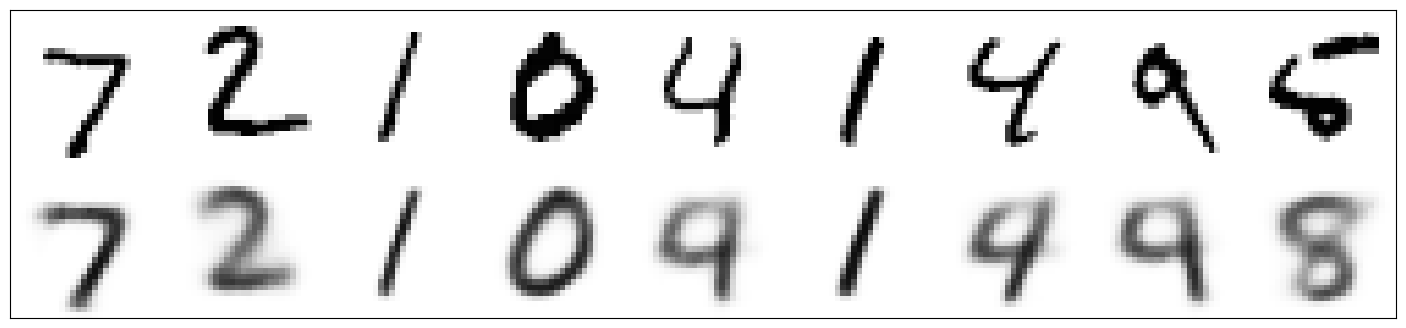

In [ ]:
plot_digits(run_res["real"][0:9], run_res["reconstr"][0:9])

И посмотрим, какое латетное представление он выучил. 

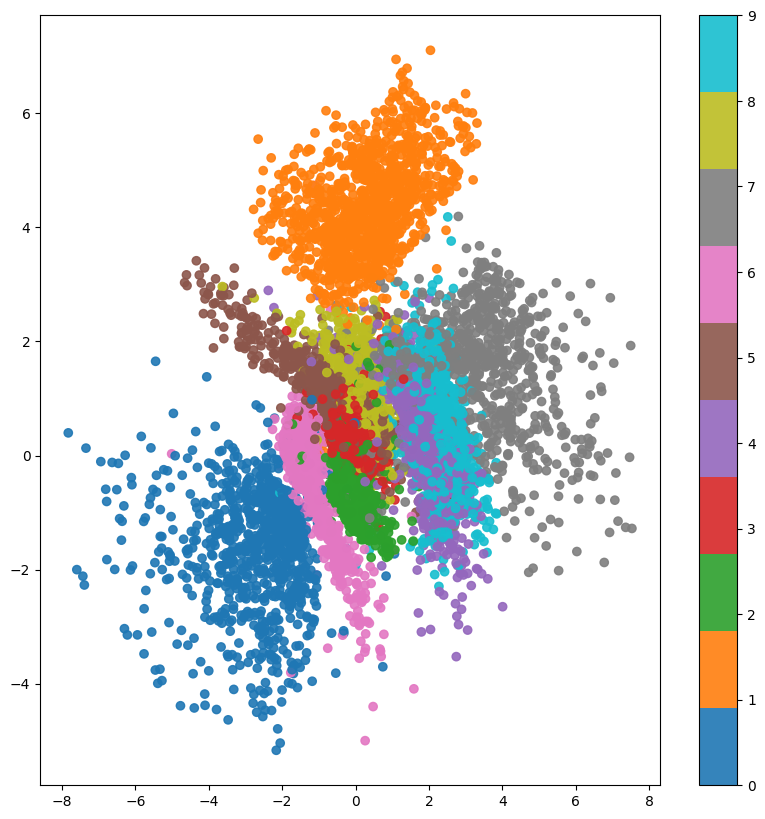

In [ ]:
plot_manifold(run_res['latent'], run_res['labels'])

А теперь обучим автоэнкодер с латентным слоем размера 24. И посмотрим, как он будет бороться с шумом

In [ ]:
torch.manual_seed(42)

latent_dim = 24
learning_rate = 1e-4
encoder = Encoder(latent_dim=latent_dim)
decoder = Decoder(latent_dim=latent_dim)


encoder = encoder.to(device)
decoder = decoder.to(device)

optimizer = optim.Adam(
    chain(encoder.parameters(), decoder.parameters()), lr=learning_rate
)

for i in range(1, 6):
    train(
        enc=encoder,
        dec=decoder,
        optimizer=optimizer,
        loader=train_loader,
        epoch=i,
        single_pass_handler=ae_pass_handler,
        loss_handler=ae_loss_handler,
        log_interval=100,
    )

Train Epoch: 1 [0/60000 (0%)]            Loss: 0.721638
Train Epoch: 1 [6400/60000 (11%)]        Loss: 0.213196
Train Epoch: 1 [12800/60000 (21%)]       Loss: 0.166439
Train Epoch: 1 [19200/60000 (32%)]       Loss: 0.136882
Train Epoch: 1 [25600/60000 (43%)]       Loss: 0.119715
Train Epoch: 1 [32000/60000 (53%)]       Loss: 0.107818
Train Epoch: 1 [38400/60000 (64%)]       Loss: 0.102777
Train Epoch: 1 [44800/60000 (75%)]       Loss: 0.098904
Train Epoch: 1 [51200/60000 (85%)]       Loss: 0.100878
Train Epoch: 1 [57600/60000 (96%)]       Loss: 0.095905
Train Epoch: 2 [0/60000 (0%)]            Loss: 0.097904
Train Epoch: 2 [6400/60000 (11%)]        Loss: 0.095098
Train Epoch: 2 [12800/60000 (21%)]       Loss: 0.089524
Train Epoch: 2 [19200/60000 (32%)]       Loss: 0.087402
Train Epoch: 2 [25600/60000 (43%)]       Loss: 0.096337
Train Epoch: 2 [32000/60000 (53%)]       Loss: 0.090122
Train Epoch: 2 [38400/60000 (64%)]       Loss: 0.088964
Train Epoch: 2 [44800/60000 (75%)]       Loss: 0

Сделаем dataloader, который добавляет в наш датасет шум автоматически

In [ ]:
class AddGaussianNoise:
    def __init__(self, mean=0.0, std=1.0):
        self.std = std
        self.mean = mean

    def __call__(self, tensor):
        return tensor + torch.randn(tensor.size()) * self.std + self.mean

    def __repr__(self):
        return self.__class__.__name__ + "(mean={0}, std={1})".format(
            self.mean, self.std
        )

Загрузим MNIST с добавленным шумом

In [ ]:
torch.manual_seed(42)

test_noise_set = dset.MNIST(
    root=root,
    train=False,
    transform=torchvision.transforms.Compose(
        [torchvision.transforms.ToTensor(), AddGaussianNoise(0.0, 0.30)]
    ),
    download=True,
)

test_noised_loader = torch.utils.data.DataLoader(
    torch.utils.data.Subset(test_noise_set, list(range(64))),
    batch_size=batch_size,
    shuffle=False,
)

In [ ]:
run_res = run_eval(encoder, decoder, test_noised_loader, ae_pass_handler)

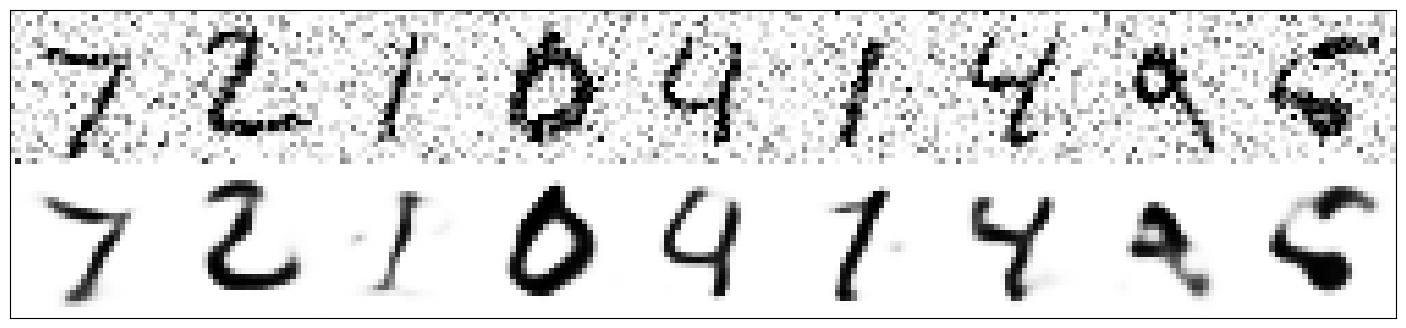

In [ ]:
plot_digits(run_res['real'][0:9], run_res['reconstr'][0:9])

Качество сжатия мы оценили визуально выше. Если обратить внимание, то исходные картинки даже почистились от мелких шумов и странностей изображения и больше стали похожи на непрерывные линии. Размерность латентного пространства `latent_size` значительно меньше исходного количества свойств (784), поэтому мы получили неплохое сжатие изображения.

## Разреженный автоэнкодер

До этого мы говорили о том, что построение эффективного автоэнкодера возможно только в случае, когда размер латентного слоя сильно меньше входных слоев. 

Что если мы сделаем автоэнкодер с размером латентного пространства больше входной размерности? 

При такой прямой реализации у нас ничего не получится, энкодер будет просто перемещать входные данные полностью в латентное пространство, без изменений. Наш автоэнкодер выучит, что ему нужно входные данные просто скопировать в латентное пространство, а потом перекопировать на вывод, т.е он ничего не выучит.

Однако, сделать латентный слой «узким местом» сети можно и иначе. Идея такая: мы добавим loss на латентный слой, который будет заключатся в следующем, что для каждого объекта использовалось ограниченное количество нейронов. 

Это позволяет модели самой выбирать размер латентного представления и использовать для разных групп объектов латентные представления разного размера, что может быть полезно для части задач и позволять получить более полезное внутреннее представление. 

<img src="https://edunet.kea.su/repo/EduNet-content/L14/img_license/sparse_autoencoder.png" alt="alttext" style="height: 700px;"/>

Для начала нам нужно задать понятие активированности нейрона. По логике это должна быть величина от 0 до 1.

0 соответствует полное отсутствие активации, 1 соответствует полная активация нейрона. Нам не подходит решение — применить сигмоиду к активациям, так как они могут быть и отрицательны, а сигмоида на отрицательных активациях стремится к нулю. А нам нужно, чтобы 0 соответствовало изначально нулевое значение. 

Потому можем сделать следующее:

 1. Берем латентный слой автоэнкодера и считаем абсолютные значения активаций. 
 2. Применяем к этим значениям сигмоиду. Теперь 0 соответствует 0.5. Полученные значения гарантированно не меньше 0.5
 3. Вычтем из этих значений 0.5 и домножим результат на 2. Теперь они распределены так, как нам нужно. 


In [ ]:
def to_01_activation(latent):
    activations = (torch.sigmoid(latent.abs()) - 0.5) * 2
    return activations

Зададим то, как для нашего автоэнкодера должен подсчитываться лосс. Он будет состоять из двух частей, первая отвечает за реконструкцию(восстановление) изображения, а вторая штрафует за включение нейронов больше некоторого порога, который мы регулируем с помощью beta

In [ ]:
def sparse_ae_loss_handler(data, recon, latent, beta=0.1, *args, **kwargs):
    activations = to_01_activation(latent)
    return (
        F.binary_cross_entropy(recon, data)
        + F.l1_loss(activations, torch.zeros_like(activations)) * beta 
    )

Создадим разреженный автоэнкодер, с размером латентного пространства больше, чем размерность входных данных

In [ ]:
torch.manual_seed(42)

latent_dim = 30 * 30

learning_rate = 1e-4
encoder = Encoder(latent_dim=latent_dim)
decoder = Decoder(latent_dim=latent_dim)

encoder = encoder.to(device)
decoder = decoder.to(device)

optimizer = optim.Adam(
    chain(encoder.parameters(), decoder.parameters()), lr=learning_rate
)

In [ ]:
from functools import partial 

for i in range(1, 6):
    train(
        enc=encoder,
        dec=decoder,
        optimizer=optimizer,
        loader=train_loader,
        epoch=i,
        single_pass_handler=ae_pass_handler,
        loss_handler=partial(sparse_ae_loss_handler, beta=0.01), # regulize beta parameter 
        log_interval=450,
    )

Train Epoch: 1 [0/60000 (0%)]            Loss: 0.645970
Train Epoch: 1 [28800/60000 (48%)]       Loss: 0.109194
Train Epoch: 1 [57600/60000 (96%)]       Loss: 0.091505
Train Epoch: 2 [0/60000 (0%)]            Loss: 0.087770
Train Epoch: 2 [28800/60000 (48%)]       Loss: 0.082621
Train Epoch: 2 [57600/60000 (96%)]       Loss: 0.084594
Train Epoch: 3 [0/60000 (0%)]            Loss: 0.084415
Train Epoch: 3 [28800/60000 (48%)]       Loss: 0.079012
Train Epoch: 3 [57600/60000 (96%)]       Loss: 0.082298
Train Epoch: 4 [0/60000 (0%)]            Loss: 0.075275
Train Epoch: 4 [28800/60000 (48%)]       Loss: 0.076685
Train Epoch: 4 [57600/60000 (96%)]       Loss: 0.073011
Train Epoch: 5 [0/60000 (0%)]            Loss: 0.074388
Train Epoch: 5 [28800/60000 (48%)]       Loss: 0.072707
Train Epoch: 5 [57600/60000 (96%)]       Loss: 0.075225


In [ ]:
encoder = encoder.eval()
decoder = decoder.eval()

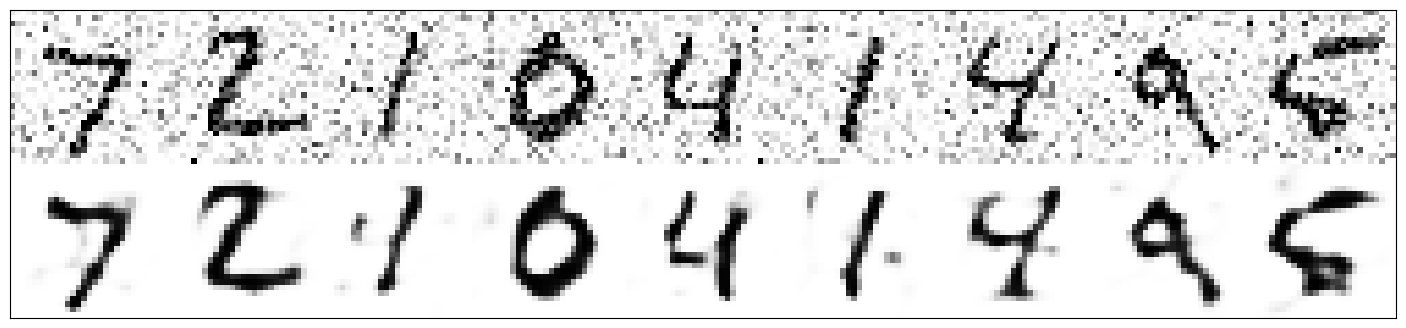

In [ ]:
run_res = run_eval(encoder, decoder, test_noised_loader, ae_pass_handler)
plot_digits(run_res['real'][0:9], run_res['reconstr'][0:9])

Видим, что разреженный автоэнкодер несмотря на большой размер латентного слоя все равно эффективно убирает шум из изображений.

Посмотрим, как активируются нейроны латентного слоя для каждого класса.

In [ ]:
run_res = run_eval(encoder, decoder, test_loader, ae_pass_handler)

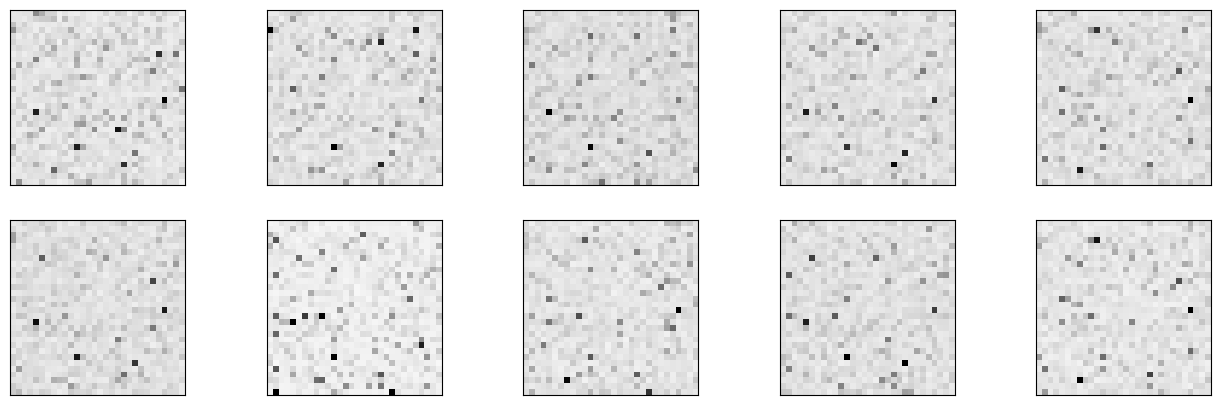

In [ ]:
_, axs = plt.subplots(nrows=2, ncols=5, figsize=(16, 5))
activations = to_01_activation(torch.from_numpy(run_res["latent"])).numpy()

up_lim = activations.max()
for label in range(0, 10):

    figure = activations[run_res["labels"] == label].mean(axis=0)
    figure = figure.reshape(30, 30)
    ax = axs[label % 2, label % 5]
    ax.imshow(figure, cmap="Greys", clim=(0, 0.5))
    ax.grid(False)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

Видим, что нейронов активируются в среднем крайне мало, между классами активирующиеся нейроны отличаются.

In [ ]:
import matplotlib as mpl

def plot_percent_hist(ax, data, bins):
    counts, _ = np.histogram(data, bins=bins)
    widths = bins[1:] - bins[:-1]
    x = bins[:-1] + widths / 2
    ax.bar(x, counts / len(data), width=widths * 0.8)
    ax.xaxis.set_ticks(bins)
    ax.yaxis.set_major_formatter(
        mpl.ticker.FuncFormatter(
            lambda y, position: "{}%".format(int(np.round(100 * y)))
        )
    )
    ax.grid(True)


def plot_activations_histogram(activations, height=1, n_bins=10):
    activation_means = activations.mean(axis=0)

    mean = activation_means.mean()
    bins = np.linspace(0, 1, n_bins + 1)

    fig, [ax1, ax2] = plt.subplots(figsize=(10, 3), nrows=1, ncols=2, sharey=True)
    plot_percent_hist(ax1, activations.ravel(), bins)
    ax1.plot(
        [mean, mean], [0, height], "k--", label="Overall Mean = {:.2f}".format(mean)
    )
    ax1.legend(loc="upper center", fontsize=14)
    ax1.set_xlabel("Activation")
    ax1.set_ylabel("% Activations")
    ax1.axis([0, 1, 0, height])
    plot_percent_hist(ax2, activation_means, bins)
    ax2.plot([mean, mean], [0, height], "k--")
    ax2.set_xlabel("Neuron Mean Activation")
    ax2.set_ylabel("% Neurons")
    ax2.axis([0, 1, 0, height])

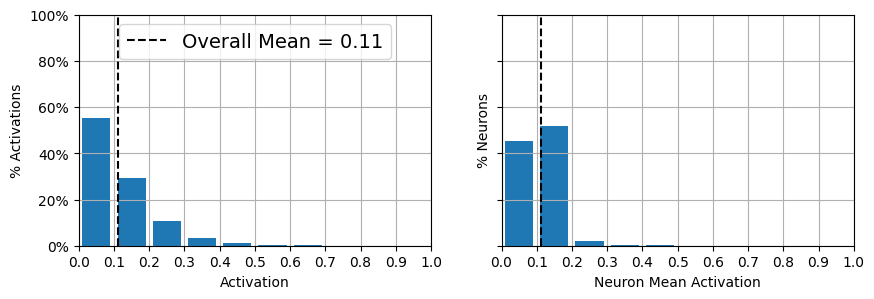

In [ ]:
plot_activations_histogram(activations, height=1.0)
plt.show()

Посмотрим, что у нас наблюдается в целом. 
В целом, видно, что средний размер активации — в районе 0.10. Причем часто активация равна 0. 
Для нейронов наблюдается похожая картина — в среднем активация нейрона по всему тестовому датасету расположена в районе 0.10 и нейроны очень редко отходят от этой области. 

Вообще говоря, нам нужная именно правая картина. Левая — лишь побочный результат применения нами L1-лосса.

Подход с L1-лосс очень просто реализуется, но в то же время не совсем очевидно, как с помощью него задать условие вида: пусть в среднем на латентном слое активируется 1% нейронов. Понятно, что это косвенно задается величиной коэффициента $\beta$, но хотелось бы задавать это в явном виде. 

### Дивергенция Кульбака-Лейблера

Для данной цели используется дивергенция Кульбака-Лейблера, которая считается по формуле: 

$$KL(P||Q) = \int_X p(x)\log \dfrac {p(x)} {q(x)} dx$$

В теории информации $p$ считается целевым распределением, а $q$ — тем, с которым мы его сравниваем. 
Важно понимать, что при этом $KL$ не является мерой расстояния, а именно в общем случае $KL(P||Q) != KL(Q||P)$.


[Оказывается](https://math.stackexchange.com/questions/90537/what-is-the-motivation-of-the-kullback-leibler-divergence), в подобных задачах она как правило обеспечивают бОльшую сходимость к требуемому распределению, нежели та же L1-регуляризация.


<img src="https://edunet.kea.su/repo/EduNet-content/L14/img_license/kl_plot.png" alt="alttext" width="350">


Пусть мы хотим, чтобы на каждом слое для данного объекта активировалось в среднем p% нейронов.

В нашем случае для каждой активации i нейрона латентного слоя $a_i^{latent}$ мы можем решить, активирован нейрон или нет. Мы можем посчитать для каждого объекта, какая доля нейронов активировалась в его случае. 

Или же мы можем усреднить активации нейронов, если активации распределены на отрезке от 0 до 1 (например, мы можем преобразовать активации, как это сделали выше). Получим величину $\hat{p}$

Фактически мы сравниваем два бернулиевских распределения — то, которое хотим мы, с параметром p, и то, которое мы наблюдаем — с оценным параметром $\hat{p}$. 

$$KL(P||Q) =  p(x) \log \dfrac {p(x)} {\hat{p}(x)} + (1 - p(x)) \log \dfrac {(1 - p(x))} {1 - \hat{p}(x)} $$

Далее лишь остается просуммировать данный лосс по батчу.

Можно делать и иначе — требовать, чтобы каждый нейрон в среднем активировался в p% случаев. В этом случае на первом шаге мы усредняем активации не по всему слою, а по батчам. А вот подсчитанный лосс усреднеяем по всем нейронам слоя. 


Чем KL-лосс лучше L1 и L2 лоссов? 
Он позволяет нам приближаться к решению более плавно и четко регулировать долю активирующихся нейронов.

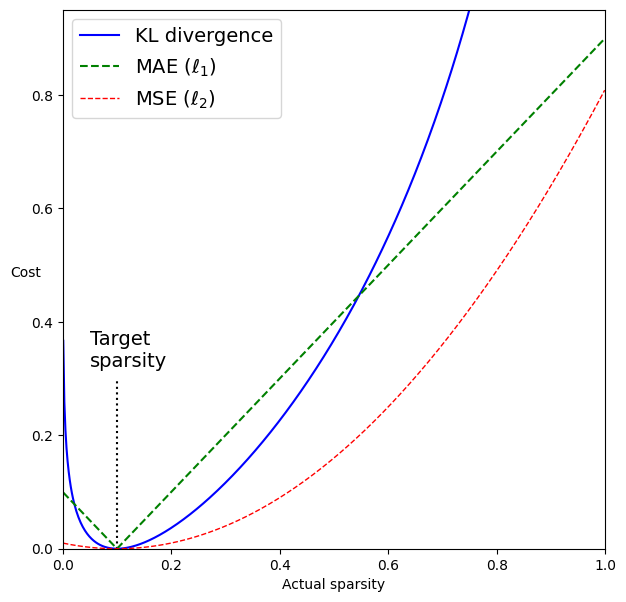

In [ ]:
plt.figure(figsize=(7, 7))
p = 0.1
q = np.linspace(0.001, 0.999, 500)
kl_div = p * np.log(p / q) + (1 - p) * np.log((1 - p) / (1 - q))
mse = (p - q) ** 2
mae = np.abs(p - q)
plt.plot([p, p], [0, 0.3], "k:")
plt.text(0.05, 0.32, "Target\nsparsity", fontsize=14)
plt.plot(q, kl_div, "b-", label="KL divergence")
plt.plot(q, mae, "g--", label=r"MAE ($\ell_1$)")
plt.plot(q, mse, "r--", linewidth=1, label=r"MSE ($\ell_2$)")
plt.legend(loc="upper left", fontsize=14)
plt.xlabel("Actual sparsity")
plt.ylabel("Cost", rotation=0)
plt.axis([0, 1, 0, 0.95])
plt.show()

## Автоэнкодер как генератор и его ограничения. Плавная интерполяция

В случае автоэнкодеров можно подавать случайный вектор на декодер и получать новые объекты. До этого мы же только восстанавливали исходную картинку.

<img src="https://edunet.kea.su/repo/EduNet-content/L14/img_license/autoencoder_as_generator.png" alt="alttext" width="700">

Какое значение вектора выбрать? Мы же никак не управляли латентным пространством. Непонятно какие числа подставлять. Поэтому мы можем выбрать промежуточные значения между двумя представлением двух исходных изображений в латентном пространстве и получить плавную интерполяцию между изображениями. Постепенно свойства одного изображения будут исчезать, а появляться свойства другого.

Обучим сначала обычный автоэнкодер 

In [ ]:
torch.manual_seed(42)

latent_dim = 24
learning_rate = 1e-4
encoder = Encoder(latent_dim=latent_dim)
decoder = Decoder(latent_dim=latent_dim)

encoder = encoder.to(device)
decoder = decoder.to(device)

optimizer = optim.Adam(
    chain(encoder.parameters(), decoder.parameters()),
    lr=learning_rate,
    weight_decay=1e-5,
)
for i in range(1, 6):
    train(
        enc=encoder,
        dec=decoder,
        optimizer=optimizer,
        loader=train_loader,
        epoch=i,
        single_pass_handler=ae_pass_handler,
        loss_handler=ae_loss_handler,
        log_interval=100,
    )

Train Epoch: 1 [0/60000 (0%)]            Loss: 0.721638
Train Epoch: 1 [6400/60000 (11%)]        Loss: 0.213190
Train Epoch: 1 [12800/60000 (21%)]       Loss: 0.166451
Train Epoch: 1 [19200/60000 (32%)]       Loss: 0.136725
Train Epoch: 1 [25600/60000 (43%)]       Loss: 0.120556
Train Epoch: 1 [32000/60000 (53%)]       Loss: 0.107979
Train Epoch: 1 [38400/60000 (64%)]       Loss: 0.103499
Train Epoch: 1 [44800/60000 (75%)]       Loss: 0.098997
Train Epoch: 1 [51200/60000 (85%)]       Loss: 0.101363
Train Epoch: 1 [57600/60000 (96%)]       Loss: 0.095490
Train Epoch: 2 [0/60000 (0%)]            Loss: 0.097546
Train Epoch: 2 [6400/60000 (11%)]        Loss: 0.095596
Train Epoch: 2 [12800/60000 (21%)]       Loss: 0.089334
Train Epoch: 2 [19200/60000 (32%)]       Loss: 0.087778
Train Epoch: 2 [25600/60000 (43%)]       Loss: 0.096151
Train Epoch: 2 [32000/60000 (53%)]       Loss: 0.089755
Train Epoch: 2 [38400/60000 (64%)]       Loss: 0.089565
Train Epoch: 2 [44800/60000 (75%)]       Loss: 0

In [ ]:
encoder = encoder.eval()
decoder = decoder.eval()

Возьмем несколько изображений

In [ ]:
imgs, labels = next(iter(test_loader))

In [ ]:
latent_space1 = encoder(imgs[labels==7][0:1].to(device))
latent_space2 = encoder(imgs[labels==6][0:1].to(device))

In [ ]:
interp_steps = 10
weight = torch.linspace(0, 1, steps=interp_steps)
interp = torch.lerp(
    latent_space1.repeat(interp_steps, 1),
    latent_space2.repeat(interp_steps, 1),
    weight=weight.view(-1, 1).to(device),
)
iterp_imgs = decoder(interp)

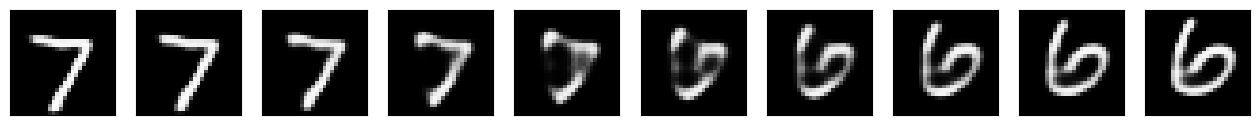

In [ ]:
_, axs = plt.subplots(nrows=1, ncols=interp_steps, figsize=(16, 4))
for label in range(0, interp_steps):
    figure = iterp_imgs[label].cpu().detach().numpy()
    figure = figure.reshape(28, 28)
    ax = axs[label]
    ax.imshow(figure, cmap="Greys_r", clim=(0, 1))
    ax.grid(False)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

Чтобы увидеть более плавные изменения, можем сделать видео. Для этого можно использовать уже известный нам OpenCV. Он умеет делать видеофайлы из массивов чисел.

In [ ]:
from PIL import Image

interp_steps = 200
weight = torch.linspace(0, 1, steps=interp_steps)
interp = torch.lerp(
    latent_space1.repeat(interp_steps, 1),
    latent_space2.repeat(interp_steps, 1),
    weight=weight.view(-1, 1).to(device),
)
iterp_imgs = decoder(interp)

resize_coeff = 10
imgs = np.squeeze(iterp_imgs.cpu().detach().numpy())
size = (imgs.shape[1] * resize_coeff, imgs.shape[2] * resize_coeff)


imgs = [
    Image.fromarray(np.uint8(img * 255)).resize(size).convert("RGB") for img in imgs
]
imgs[0].save(
    "ae_img.gif",
    save_all=True,
    append_images=imgs[1:],
    optimize=False,
    duration=40,
    loop=0,
)

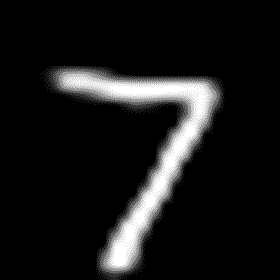

In [ ]:
from IPython.display import Image as iImage

iImage(open("ae_img.gif", "rb").read())

Так себе интерполяция вышла. Старое изображение затухает, а новое изображение появляется. Хочется, чтобы в промежуточных кадрах не было каких-то непонятных очертаний, а изображение было чем-то промежуточным по смыслу между стартовым и конечным изображением. Причина неудачи в том, что в латентном пространстве действительно возникли зоны, которые умеют декодироваться в хорошие изображения. Но никто не сказал, что между этими зонами должно быть что-то адекватное (что мы видели из представления).

<img src="https://edunet.kea.su/repo/EduNet-content/L14/img_license/autoencoder_as_generator_problem.png" alt="alttext" width="500">

Представим это графически. Пусть наш очень умный, содержащий очень много коэффициентов, энкодер и декодер смог разложить все входные объекты на одной оси (размерность латентного пространства — 1). По сути он каждому входному изображению присвоил номер и по номеру может это изображение вспомнить. То есть автоэнкодер очень переобученный. Тогда если мы возьмём промежуточный номер (пытаемся интерполировать), то какое изображение мы собираемся получить?

<img src="https://edunet.kea.su/repo/EduNet-content/L14/img_license/autoencoder_as_generator_problem_explanation.png" alt="alttext" width="950">

Если мы хотим, чтобы декодированные промежуточные латентные состояния имели черты близких к ним объектов, то надо притянуть латентные координаты похожих объектов. Например вот так:


<img src="https://edunet.kea.su/repo/EduNet-content/L14/img_license/irregular_and_regular_latent_space.png" alt="alttext" width="950">

# Вариационные автоэнкодеры (VAE)

Мотивация:

Хотим вместо представления слева получить представление справа

<img src="https://edunet.kea.su/repo/EduNet-content/L14/img_license/latent_space_with_and_witout_regularization.png" alt="alttext" width="850">



При этом зоны пересечения должны действительно содержать переходные картины 



<img src="https://edunet.kea.su/repo/EduNet-content/L14/img_license/vae_latent_space.png" alt="alttext" width="400">


Решение с помощью регуляризации

Можем попробовать заставить наши объекты «лежать» рядом — будем штрафовать латентные представления, которые далеко уходят от начала координат. 

Можем использовать как L1, так и L2 регуляризацию, так и их комбинацию — elastic loss.




Однако, это приведет просто к масштабированию распределения (по сути — мы уже увидели результат этого для случая разреженного автоэнкодера, у которого эта регуляризация есть). Нам надо одновременно получить связное латентное представление — чтобы у нас не возникало зон в латентном представлении, которым не соответствует ничего, и при этом представление, в котором цифры будут отделены друг от друга. 

<img src="https://edunet.kea.su/repo/EduNet-web_dependencies/L14/reconstruction_loss_only.png" alt="alttext" width="450">

[Intuitively Understanding Variational Autoencoders](https://towardsdatascience.com/intuitively-understanding-variational-autoencoders-1bfe67eb5daf)

Мы имеем ситуацию, как на картинке слева. Переход-интерполяция между объектами проходит через зону отсутствующих в обучении объектов, декодирование которых даст несуществующие в реальности объекты. Нам не удастся погенерировать новые картинки, преобразовывая случайную точку из латентного пространства в случайную картинку. 


## Реализация вариационного автоэнкодера

При этом постановка задачи с автоэнкодером говорит нам, что есть некое пространство меньшей размерности $Z$, которое и обуславливает процесс генерации объектов из $X$. Все остальные различия — следствия случайности — один и тот же человек может по-разному нарисовать цифру 5. 

Будем искать латентное пространство Z, которое удовлетворяет следующему условию:

$$p(x) = \int p(x, z)dz $$

Кроме того, пусть объекты из Z легко генерировать. 

По формуле совместной вероятности:

$$p(x, z) = p(x|z)p(z) $$

Ну, осталось только подобрать такие параметры, чтобы все работало)) 



К сожалению, сделать это в таком виде не получится. Пространство $X$ может быть высокоразмерным. 

Но — мы можем существенно сузить область поиска, ведь каждому $x$ из пространства $X$ соответствует лишь небольшая возможная область в $Z$.

Для этого будем также учить отображение из пространства $X$ в пространство $Z$, т.е, пытаться выучить $p(z|x)$. Назовем функцию, которой будем его приближать $q(z|x)$. 

Что же в случае автоэнкодера выполняет роль p(x|z) и q(z|x) ?
Очевидно — кодировщик и декодировщик соответственно. 


<img src="https://edunet.kea.su/repo/EduNet-content/L14/img_license/vae_as_two_functions.png" alt="alttext" width="850">


Чтобы все получилось, нужно сделать с кодировщиком две вещи. Заметьте, что декодировщик мы оставим без изменений.

### Первая модификация

Пусть наш кодировщик генерирует на основе объекта X вектор средних и вектор стандартных отклонений.

Этих двух векторов хватает нам для того, чтобы задать многомерное нормальное распределение с независимыми компонентами (чтобы матрица ковариаций была диагональной), соответствующее данному объекту.

Чтобы получить латентное представление объекта, отличающегося от X только в силу случайности нам достаточно сгенерировать вектор из нормального распределения с такими параметрами. 

<img src="https://edunet.kea.su/repo/EduNet-content/L14/img_license/vae_architecture_first_modification.png" alt="alttext" width="850">

Далее мы можем требовать, чтобы из полученного латентного представления декодировшик восстанавливал объект, похожий на исходный. 

Здесь, однако, сразу возникает возникает проблема с тем, что граф вычислений, соответствующий предыдущей структуре не может пропускать градиент — как пропустить градиент через генератор случайного нормального числа? Если считать из определения, то даже малейшему изменению параметра могут соответствовать бесконечные изменения генерируемого числа (нормальное распределение определено на бесконечности). В общем, проблема. 

Но мы можем вспомнить замечательное свойство одномерного нормального распределения:

$$N(\mu,\sigma^2) = N(0,1) * \sigma + \mu$$ 

Выполняется это и для многомерного случая. Потому сделаем следующее — будем генерировать значение из нормального распределения с средними 0 и дисперсиями 1, а затем домножать это на вектор стандартных отклонений и прибавлять вектор средних. Получится вот такое преобразование, которое называется **reparametrization trick**.

<img src="https://edunet.kea.su/repo/EduNet-content/L14/img_license/reparametrization_trick.png" alt="alttext" width="850">



В отличии от левого случая, в правом мы спокойно можем пропустить градиент через детерминистичные ноды. 


Но если просто применить такой принцип, то он снова имеет проблему предыдущего детерминистического подхода, так как вероятностное распределение сможет свернуться в дельта-функцию — зачем нейросети мучаться с объектами, немного отличающимися от тех, что есть в обучающей выборке и пытаться нормально их восстанавливать, если можно просто начать генерировать стандартные отклонения, близкие к нулю и тем самым получить $\delta$-функцию, которая будет нашему объекту всегда сопоставлять одну точку в латентном представлении. 


<img src="https://edunet.kea.su/repo/EduNet-web_dependencies/L14/Dirac_function_approximation.gif" alt="alttext" width="170">


### Вторая модификация

Поэтому нам надо ввести регуляризацию, требующую от каждого распределения быть близким к нормальному распределению вокруг нуля координат латентного пространства с дисперсией 1 (наше $P(z)$). 

В принципе, нам подойдёт любая адекватная мера расстояния между двумя распределениями. Мы уже использовали KL-дивергенцию, будем использовать ее и здесь 

### Только KL-дивергенция

Что произойдет, если мы будем использовать такой лосс при обучении модели?

$$ Loss =  KL(Q(z|x)||P(z)) $$

Если подставить на место p(z) нормальное распределение, то получим следующее выражение:


$$KL(N(\mu, \sigma) || N(0, 1)) = \log \frac{1}{\sigma} + \frac{\sigma^2 + \mu^2}{2} - \frac{1}{2}$$

$$KL(N(\mu, \sigma) || N(0, 1)) = -\log {\sigma} + \frac{\sigma^2 + \mu^2}{2} - \frac{1}{2} = -\frac {1} {2}(2 \log {\sigma} - \sigma^2 - \mu^2 + 1) = -\frac {1} {2}(\log {\sigma^2} - \sigma^2 - \mu^2 + 1)$$


<img src="https://edunet.kea.su/repo/EduNet-web_dependencies/L14/pure_kl_loss.png" alt="alttext" width="350">




Видим, что мы забываем про декодировщик — он может выдавать все, что угодно. Потому логично ожидать, что обучится только кодировщик и обучится он отражать наши точки в нормальное распределение со средним 0 и дисперсией 1. И все, большего ему в жизни и не надо. Можем проверить это. 

In [ ]:
torch.manual_seed(42)

class VAEEncoder(Encoder):
    def __init__(self, latent_dim):
        if latent_dim % 2 != 0: # check for the parity of the latent space
            raise Exception("Latent size for VAEEncoder must be even")
        super().__init__(latent_dim)


def vae_split(latent):
    size = latent.shape[1] // 2 # divide the latent representation into mu and log_var
    mu = latent[:, :size] 
    log_var = latent[:, size:]  
    return mu, log_var


def vae_reparametrize(mu, log_var): 
    sigma = torch.exp(0.5 * log_var) 
    z = torch.randn(mu.shape[0], mu.shape[1]).to(device) 
    return z * sigma + mu 


def vae_pass_handler(encoder, decoder, data, *args, **kwargs): 
    latent = encoder(data) 
    mu, log_var = vae_split(latent) 
    sample = vae_reparametrize(mu, log_var) 
    recon = decoder(sample)
    return latent, recon


def kld_loss(mu, log_var): 
    var = log_var.exp()
    kl_loss = torch.mean(-0.5 * torch.sum(1 + log_var - mu ** 2 - var, dim=1), dim=0)
    return kl_loss


def kl_loss_handler(data, recon, latent, kld_weight=0.1, *args, **kwargs):
    mu, log_var = vae_split(latent)
    kl_loss = kld_loss(mu, log_var)
    return kld_weight * kl_loss 

Обучим VAE

In [ ]:
torch.manual_seed(42)

latent_dim = 2

learning_rate = 1e-4
encoder = VAEEncoder(latent_dim=latent_dim * 2)
decoder = Decoder(latent_dim=latent_dim)


encoder = encoder.to(device)
decoder = decoder.to(device)

optimizer = optim.Adam(
    chain(encoder.parameters(), decoder.parameters()), lr=learning_rate
)
for i in range(1, 3):
    train(
        enc=encoder,
        dec=decoder,
        optimizer=optimizer,
        loader=train_loader,
        epoch=i,
        single_pass_handler=vae_pass_handler,
        loss_handler=kl_loss_handler,
        log_interval=450,
    )

Train Epoch: 1 [0/60000 (0%)]            Loss: 0.027355
Train Epoch: 1 [28800/60000 (48%)]       Loss: 0.000251
Train Epoch: 1 [57600/60000 (96%)]       Loss: 0.000072
Train Epoch: 2 [0/60000 (0%)]            Loss: 0.000082
Train Epoch: 2 [28800/60000 (48%)]       Loss: 0.000036
Train Epoch: 2 [57600/60000 (96%)]       Loss: 0.000052


In [ ]:
encoder = encoder.eval()
decoder = decoder.eval()

In [ ]:
run_res = run_eval(encoder, decoder, test_loader, vae_pass_handler)

In [ ]:
mu, log_var = vae_split(run_res['latent'])
var = np.exp(log_var)

Все генерируемые средние почти неотличимы от нуля

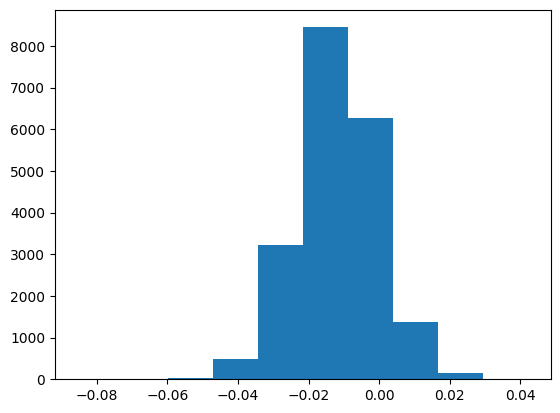

In [ ]:
plt.hist(mu.ravel())
plt.show()

Все генерируемые дисперсии почти неотличимы от 1

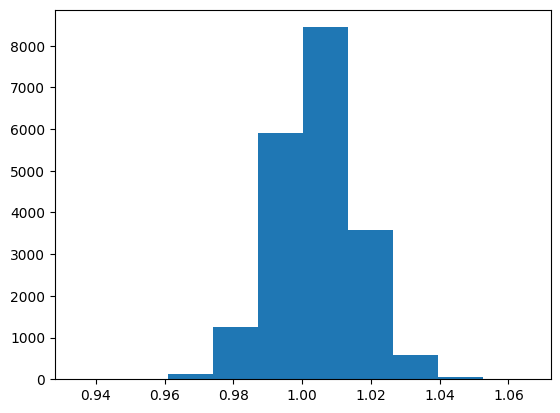

In [ ]:
plt.hist(var.ravel())
plt.show()

В результате получили практически не разделимые объекты:

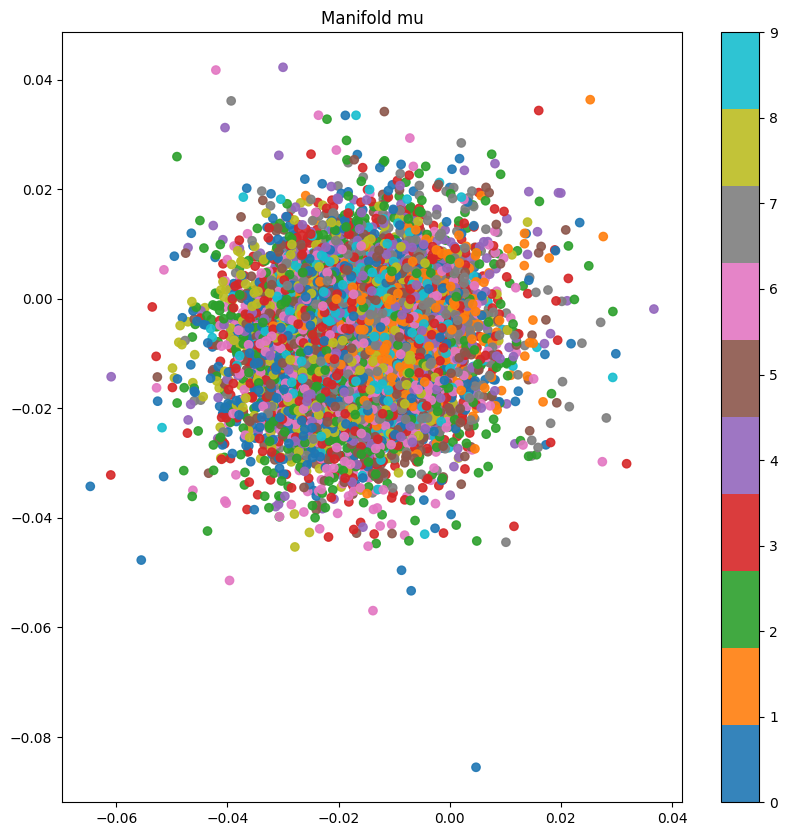

In [ ]:
import seaborn as sns

pal = sns.color_palette("Paired", n_colors=10)
plot_manifold(mu, run_res["labels"], title='Manifold mu')
plt.show()

### Совмещаем ошибку восстановления и KL-дивергению


Поэтому мы должны сохранить исходный лосс — декодировщик штрафуется за то, что не может нормально реконструировать объект. 

Формально это записывается следующим образом: 

$$ vae\_loss = E_{z \sim Q(z|x)}[logP(x|z)] + KL[Q(z|x)||P(z)]$$

А в итоге:

$$ vae\_loss = ||x - \tilde{x}||^2 - \frac 1 2 (1 + \log\sigma^2 - \mu^2 - \sigma^2)$$





Вторая компонента осталась без изменений, а первая — это красиво записанное требование корректно восстанавливать объекты из обучающей выборки и чтобы при этом объекты, полученные их небольшим изменением за счет случайности также восстанавливались в объекты, близкие к объектам из тренировочной выборки. И удовлетворять этой компоненте лосса мы можем за счет того же лосса, который использовали в обычном автоэнкодере. 

Учет обеих компонент позволяет нам получить то, что мы хотели — непрерывное простанство, где нет «дыр» в представлении, и при этом близкие по смыслу объекты расположены рядом, а далекие — далеко. 


<img src="https://edunet.kea.su/repo/EduNet-web_dependencies/L14/kl_repr_loss.png" alt="alttext" width="350">

Напишем наш новый loss: 

In [ ]:
def vae_loss_handler(data, recons, latent, kld_weight=0.005, *args, **kwargs):
    mu, log_var = vae_split(latent)
    kl_loss = kld_loss(mu, log_var)
    return kld_weight * kl_loss + F.binary_cross_entropy(recons, data) # add bce loss(reconstruction) 

Теперь обучим наш VAE:

In [ ]:
torch.manual_seed(42)

latent_dim = 2

learning_rate = 1e-4
encoder = VAEEncoder(latent_dim=latent_dim * 2)
decoder = Decoder(latent_dim=latent_dim)


encoder = encoder.to(device)
decoder = decoder.to(device)

optimizer = optim.Adam(
    chain(encoder.parameters(), decoder.parameters()), lr=learning_rate
)
for i in range(1, 6):
    train(
        enc=encoder,
        dec=decoder,
        optimizer=optimizer,
        loader=train_loader,
        epoch=i,
        single_pass_handler=vae_pass_handler,
        loss_handler=vae_loss_handler,
        log_interval=450,
    )

Train Epoch: 1 [0/60000 (0%)]            Loss: 0.848170
Train Epoch: 1 [28800/60000 (48%)]       Loss: 0.223730
Train Epoch: 1 [57600/60000 (96%)]       Loss: 0.217301
Train Epoch: 2 [0/60000 (0%)]            Loss: 0.207359
Train Epoch: 2 [28800/60000 (48%)]       Loss: 0.215272
Train Epoch: 2 [57600/60000 (96%)]       Loss: 0.208418
Train Epoch: 3 [0/60000 (0%)]            Loss: 0.209181
Train Epoch: 3 [28800/60000 (48%)]       Loss: 0.207538
Train Epoch: 3 [57600/60000 (96%)]       Loss: 0.221433
Train Epoch: 4 [0/60000 (0%)]            Loss: 0.215544
Train Epoch: 4 [28800/60000 (48%)]       Loss: 0.196534
Train Epoch: 4 [57600/60000 (96%)]       Loss: 0.204444
Train Epoch: 5 [0/60000 (0%)]            Loss: 0.207109
Train Epoch: 5 [28800/60000 (48%)]       Loss: 0.211584
Train Epoch: 5 [57600/60000 (96%)]       Loss: 0.213616


In [ ]:
encoder = encoder.eval()
decoder = decoder.eval()

In [ ]:
run_res = run_eval(encoder, decoder, test_loader, vae_pass_handler)

In [ ]:
mu, log_var = vae_split(run_res['latent'])

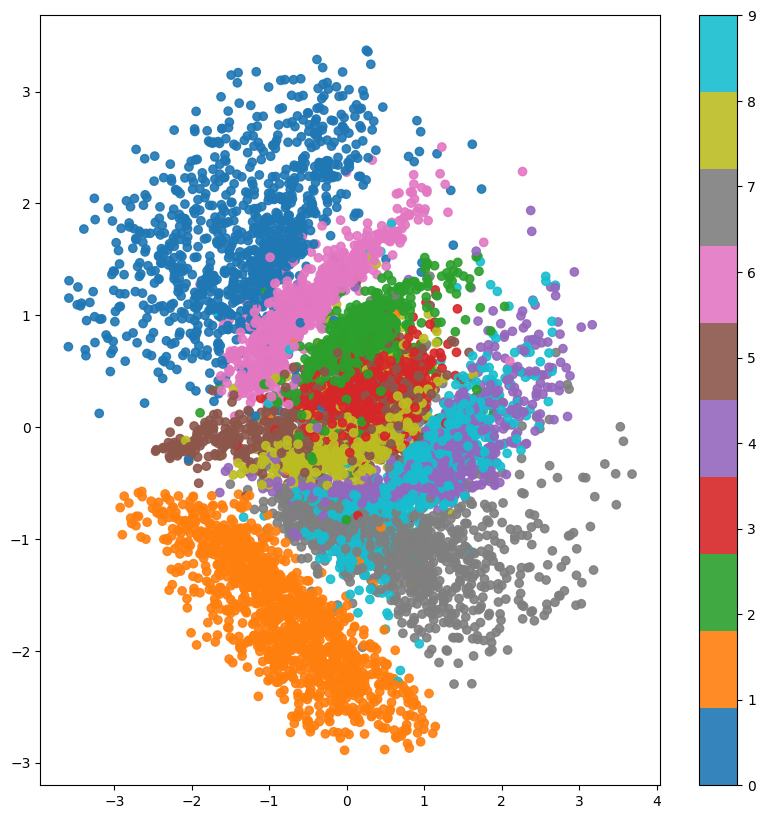

In [ ]:
pal = sns.color_palette('Paired', n_colors=10)
plot_manifold(mu, run_res['labels'])
plt.show()

Видим, что цифры разделились в пространстве, но при этом жмутся друг к другу. При этом, что интересно, 4 и 9 почти неотличимы. Это можно объяснить тем, что двух компонент недостаточно, чтобы разделить настолько похожие цифры (по сути, все отличие в заполненности области между двумя рожками 4).

Посмотрим, как теперь получится интерполировать между 1 и 9. Для большей красоты и сравнимости с обычным автоэнкодером картин возьмем latent space такого же размера, как у него (24)

In [ ]:
torch.manual_seed(42)

latent_dim = 24
learning_rate = 1e-4

encoder = VAEEncoder(latent_dim=latent_dim * 2)
decoder = Decoder(latent_dim=latent_dim)

encoder = encoder.to(device)
decoder = decoder.to(device)

optimizer = optim.Adam(
    chain(encoder.parameters(), decoder.parameters()), lr=learning_rate
)
for i in range(1, 6):
    train(
        enc=encoder,
        dec=decoder,
        optimizer=optimizer,
        loader=train_loader,
        epoch=i,
        single_pass_handler=vae_pass_handler,
        loss_handler=vae_loss_handler,
        log_interval=450,
    )

Train Epoch: 1 [0/60000 (0%)]            Loss: 0.620591
Train Epoch: 1 [28800/60000 (48%)]       Loss: 0.214420
Train Epoch: 1 [57600/60000 (96%)]       Loss: 0.203578
Train Epoch: 2 [0/60000 (0%)]            Loss: 0.193494
Train Epoch: 2 [28800/60000 (48%)]       Loss: 0.195186
Train Epoch: 2 [57600/60000 (96%)]       Loss: 0.189214
Train Epoch: 3 [0/60000 (0%)]            Loss: 0.189668
Train Epoch: 3 [28800/60000 (48%)]       Loss: 0.195616
Train Epoch: 3 [57600/60000 (96%)]       Loss: 0.177548
Train Epoch: 4 [0/60000 (0%)]            Loss: 0.187020
Train Epoch: 4 [28800/60000 (48%)]       Loss: 0.185767
Train Epoch: 4 [57600/60000 (96%)]       Loss: 0.178245
Train Epoch: 5 [0/60000 (0%)]            Loss: 0.186503
Train Epoch: 5 [28800/60000 (48%)]       Loss: 0.178082
Train Epoch: 5 [57600/60000 (96%)]       Loss: 0.187089


In [ ]:
encoder = encoder.eval()
decoder = decoder.eval()

In [ ]:
imgs, labels = next(iter(test_loader))
latent_space1_mu, _ = vae_split(encoder(imgs[labels == 7][0:1].to(device)))
latent_space2_mu, _ = vae_split(encoder(imgs[labels == 6][0:1].to(device)))

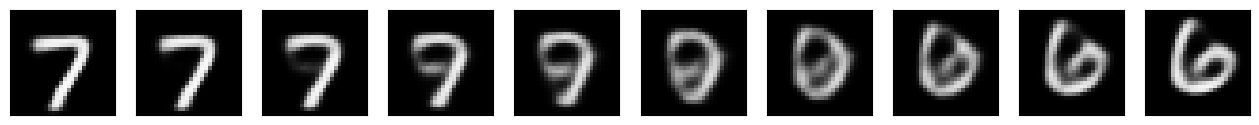

In [ ]:
interp_steps = 10
weight = torch.linspace(0, 1, steps=interp_steps)
interp = torch.lerp(
    latent_space1_mu.repeat(interp_steps, 1),
    latent_space2_mu.repeat(interp_steps, 1),
    weight=weight.view(-1, 1).to(device),
)
iterp_imgs = decoder(interp)
_, axs = plt.subplots(nrows=1, ncols=interp_steps, figsize=(16, 4))
for label in range(0, interp_steps):
    figure = iterp_imgs[label].cpu().detach().numpy()
    figure = figure.reshape(28, 28)
    ax = axs[label]
    ax.imshow(figure, cmap="Greys_r", clim=(0, 1))
    ax.grid(False)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
plt.show()

Видим плавную интерполяцию. Посмотрим на примере с видео

In [ ]:
from PIL import Image

interp_steps = 200
weight = torch.linspace(0, 1, steps=interp_steps)
interp = torch.lerp(
    latent_space1_mu.repeat(interp_steps, 1),
    latent_space2_mu.repeat(interp_steps, 1),
    weight=weight.view(-1, 1).to(device),
)
iterp_imgs = decoder(interp)


resize_coeff = 10
imgs = np.squeeze(iterp_imgs.cpu().detach().numpy())
size = (imgs.shape[1] * resize_coeff, imgs.shape[2] * resize_coeff)


imgs = [
    Image.fromarray(np.uint8(img * 255)).resize(size).convert("RGB") for img in imgs
]
imgs[0].save(
    "vae_img.gif",
    save_all=True,
    append_images=imgs[1:],
    optimize=False,
    duration=40,
    loop=0,
)

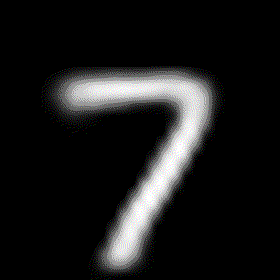

In [ ]:
from IPython.display import Image as iImage
iImage(open('vae_img.gif','rb').read())

Все переходы понятны и в процессе не возникает невозможных цифр

Если мы используем размерность латентного пространства 2, то это позволит нам получать распределение классов цифр на плоскости, типа такого:


<img src="https://edunet.kea.su/repo/EduNet-web_dependencies/L14/vae_sampling.png" alt="alttext" width="350">



Это не просто интерполяция по двум направлениям. Тут именно все 10 цифр должны так занять место на плоскости, чтобы плавно перетекать друг в друга.

Проверим, наконец, что вариационный автоэнкодер работает как автоэнкодер, и может, к примеру, убирать шум

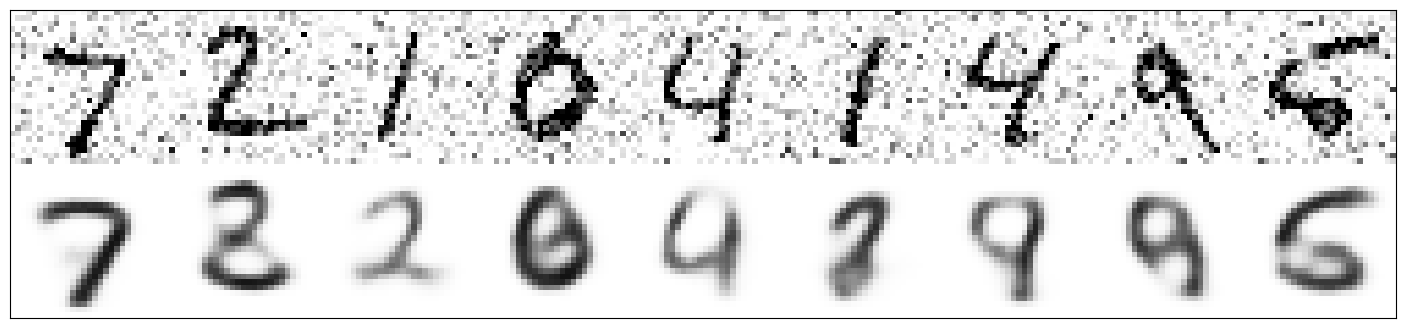

In [ ]:
run_res = run_eval(encoder, decoder, test_noised_loader, vae_pass_handler)
plot_digits(run_res['real'][0:9], run_res['reconstr'][0:9])

Видим, что автоэнкодер работает, пусть не лучше, чем обычный, возможно, даже хуже. Можно добиться улучшения его работы, поставив меньший вес KL-лоссу и увеличив латентное пространство. 

Аналогично посмотрим, как он восстанавливает изображения

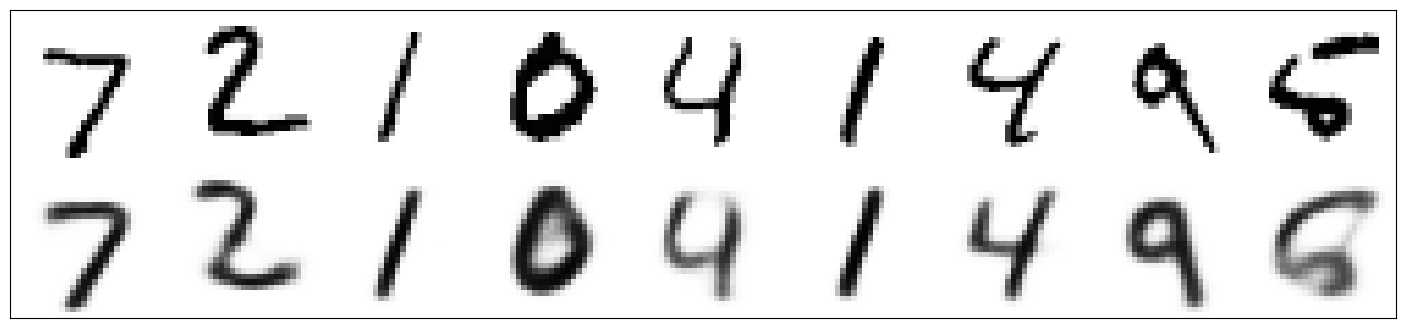

In [ ]:
run_res = run_eval(encoder, decoder, test_loader, vae_pass_handler)
plot_digits(run_res['real'][0:9], run_res['reconstr'][0:9])

Работает, но изображения получаются "размытыми". Это следствие сэмплирования из нормального распределения.

### Векторная арифметика

В принципе, можно даже в латентном пространстве брать разницу черт написания двух одинаковых цифр, прибавлять к другой цифре, получая в результате цифру, написанную немного по-другому. 


Такое можно делать и для других примеров — добавлять людям на изображении очки. 

<img src="https://edunet.kea.su/repo/EduNet-content/L14/img_license/vector_arithmetic_add_new_property.png" alt="alttext" width="400">

или получать нечто среднее между двумя объектами.

<img src="https://edunet.kea.su/repo/EduNet-content/L14/img_license/vector_arithmetic_get_half_property.png" alt="alttext" width="400">

Подробнее: 

У нас есть 1, написанная без наклона и 1, написанная с наклоном. 
И у нас есть 9 без наклона.

Вычитаем из латентного кода 1 с наклоном латентный код единицы без наклона и прибавляем к 9. Если все пройдет хорошо — получим девятку с наклоном. 



<img src="https://edunet.kea.su/repo/EduNet-web_dependencies/L14/vector_arithmetic_example.png" alt="alttext" width="550">


Попробуем это сделать сами

In [ ]:
imgs, labels = next(iter(test_loader))
real9_f = imgs[labels == 9][0:1]
real9_s = imgs[labels == 9][1:2]
real1 = imgs[labels == 1][0:1]

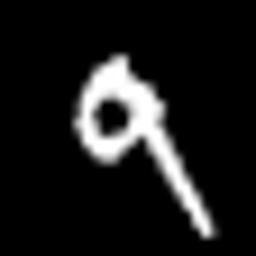

In [ ]:
size = (256, 256)
Image.fromarray(np.uint8(np.squeeze(real9_f.numpy()) * 255)).resize(size)

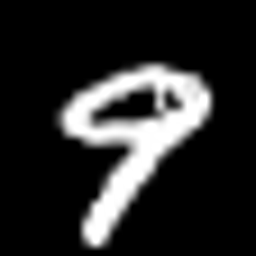

In [ ]:
Image.fromarray(np.uint8(np.squeeze(real9_s.numpy()) * 255) ).resize(size)

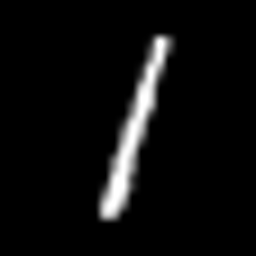

In [ ]:
Image.fromarray(np.uint8(np.squeeze(real1.numpy()) * 255) ).resize(size)

In [ ]:
latent_9f, _ = vae_split(encoder(real9_f.to(device)))
latent_9s, _ = vae_split(encoder(real9_s.to(device)))
latent_1, _ = vae_split(encoder(real1.to(device)))

In [ ]:
latent = latent_1 + latent_9f - latent_9s
gen = decoder(latent)

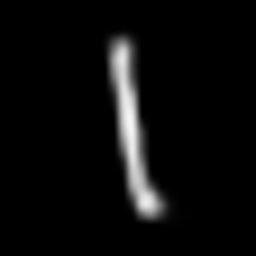

In [ ]:
Image.fromarray(np.uint8(np.squeeze(gen.cpu().detach().numpy()) * 255) ).resize(size)

Получилось перенести на 1 часть стиля 9. Получилось неидеально. Обычно для получения возможности использовать векторную арифметику, используют специальные лоссы и архитектуры. Простой VAE не гарантирует того, что "фокус удастся".

# Классифицируем семейства белков по последовательности

In [ ]:
import os

import pandas as pd
import numpy as np
import torch
from tqdm import tqdm
import gc
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [ ]:
def get_esm_embeddings(model, alphabet, batch_converter, data, device):
    gc.collect()
    model.eval()
    model.to(device)
    
    batch_labels, batch_strs, batch_tokens = batch_converter(data)
    batch_lens = (batch_tokens != alphabet.padding_idx).sum(1)
    batch_tokens = batch_tokens.to(device)
    
    with torch.no_grad():
        results = model(batch_tokens, repr_layers=[33], return_contacts=True)
    token_representations = results["representations"][33]
    
    sequence_representations = []
    for i, tokens_len in enumerate(batch_lens):
        sequence_representations.append(token_representations[i, 1 : tokens_len - 1].mean(0).to("cpu").numpy())
        
    return sequence_representations

In [ ]:
!gdown 1e21H9DkmLorK7zNxPp0zHoCWiWMd9d_4 -O protein_data.csv -q

In [ ]:
protein_data = pd.read_csv("protein_data.csv", index_col=0)
protein_data.head()

family_id         sequence_name family_accession  \
0       His_kinase  Q47E94_DECAR/372-450       PF06580.13   
1       Bac_transf  D3EZT3_CONWI/319-507       PF02397.16   
2  Methyltransf_25   I0H660_ACTM4/51-146        PF13649.6   
3  Methyltransf_25   N4UQ24_FUSC1/58-155        PF13649.6   
4  Methyltransf_25   D1CBP9_THET1/45-135        PF13649.6   

                                    aligned_sequence  \
0  SE.I..KLLHAQVNPHFLFNALNTL......S....AV...I.......   
1  KRTFDLIG.SL.....LLLT.L.L.S...P.L.L...L....T......   
2  VLDVGCGT.G...V..TT...RA..AA.AA.......A...........   
3  VLELGCGS.G...S........P..FI.ST.......LL.ARA......   
4  IADVGAGT.G...R..FA...AQ..LA.RI.......G...........   

                                            sequence  
0  SEIKLLHAQVNPHFLFNALNTLSAVIRRDPEKACHLVLNLSTFFRK...  
1  KRTFDLIGSLLLLTLLSPLLLTLSLAVKLSSRGPVFYRSTRPGIGG...  
2  VLDVGCGTGVTTRAAAAAAPAGHALGVDLSSAMIDVARGLAGRAGL...  
3  VLELGCGSGSPFISTLLARAPSVHVHANDLSDVQLDLARQNLAGYQ...  
4  IADVGAGTGRFAAQLARIGVNVVAIEPSGPMRDIGVRTTRDLSVRW...

In [ ]:
model, alphabet = torch.hub.load("facebookresearch/esm:main", "esm2_t33_650M_UR50D")

Using cache found in /root/.cache/torch/hub/facebookresearch_esm_main


In [ ]:
data = [(f"protein_{i+1}", protein_data["sequence"][i]) for i in range(protein_data.shape[0])][:10]

In [ ]:
batch_converter = alphabet.get_batch_converter()
batch_size = 10
num_iter = np.ceil(len(data) / batch_size).astype(int)
sequence_embeddings = []

for i in tqdm(range(num_iter)):
    sequence_representations = get_esm_embeddings(model,
                                                  alphabet,
                                                  batch_converter,
                                                  data[i*batch_size:(i+1)*batch_size],
                                                  device="cuda")
    
    sequence_embeddings += sequence_representations

100%|██████████| 1/1 [00:02<00:00,  2.13s/it]


In [ ]:
col_names = [f"seq_emb_{i}" for i in range(np.array(sequence_embeddings).shape[1])]
esm_emb_data = pd.DataFrame(data=np.array(sequence_embeddings),
                            columns=col_names)

In [ ]:
!gdown 1jc05fWagLwxXMdcPqZX2LUxeNKdGbZFD -O esm_emb_data.csv -q

In [ ]:
esm_emb_data = pd.read_csv("esm_emb_data.csv", index_col=0)

In [ ]:
esm_emb_data.head()

seq_emb_0  seq_emb_1  seq_emb_2  seq_emb_3  seq_emb_4  seq_emb_5  \
0   0.135971  -0.101031  -0.037692  -0.007020  -0.051893   0.066342   
1  -0.030878  -0.028008   0.085974   0.062769   0.012299  -0.014163   
2   0.027517   0.017362   0.007140  -0.077874  -0.072234   0.103430   
3   0.062280   0.039895   0.020791  -0.002005  -0.036857   0.037830   
4   0.047339  -0.027348   0.042837   0.002727  -0.086882   0.025888   

   seq_emb_6  seq_emb_7  seq_emb_8  seq_emb_9  ...  seq_emb_1270  \
0  -0.014474  -0.098033   0.042172  -0.018535  ...      0.080495   
1  -0.002042   0.010505  -0.010193   0.072156  ...     -0.025780   
2   0.012972  -0.008115   0.006102  -0.028256  ...     -0.014064   
3  -0.010252   0.016163  -0.011190  -0.009823  ...      0.031550   
4   0.002509  -0.002386  -0.102489   0.019036  ...      0.029777   

   seq_emb_1271  seq_emb_1272  seq_emb_1273  seq_emb_1274  seq_emb_1275  \
0      0.073855     -0.081798      0.069442      0.093934     -0.053073   
1     -0.081234     -0.103773      0.070998      0.083338      0.105628   
2     -0.039781      0.014527     -0.007864     -0.028362      0.093748   
3      0.005618      0.037442     -0.077101     -0.065769      0.043709   
4     -0.025346     -0.025677     -0.006795     -0.010680      0.093519   

   seq_emb_1276  seq_emb_1277  seq_emb_1278  seq_emb_1279  
0      0.078033     -0.035581     -0.006286      0.010815  
1     -0.021410     -0.042246     -0.035850     -0.005715  
2      0.023272     -0.109341     -0.047524     -0.033646  
3     -0.014301     -0.139830     -0.009175     -0.021008  
4      0.057347     -0.144237     -0.024835     -0.002137  

[5 rows x 1280 columns]

## Нарисуем наши данные

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold, cross_val_score

In [ ]:
pca = PCA(n_components=2).fit(StandardScaler().fit_transform(esm_emb_data))

In [ ]:
esm_emb_data_reduced = pca.fit_transform(esm_emb_data)

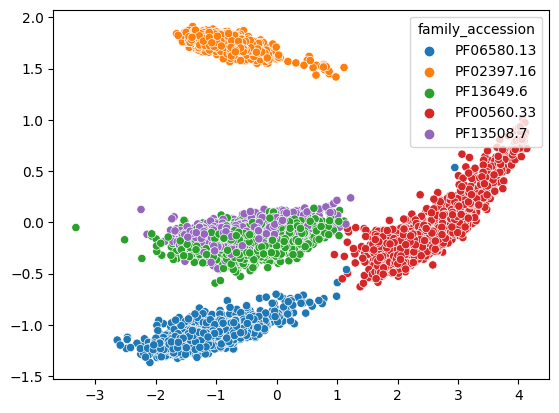

In [ ]:
sns.scatterplot(x=esm_emb_data_reduced[:, 0], 
                y=esm_emb_data_reduced[:, 1], 
                hue=protein_data["family_accession"]);

## Baseline model

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(esm_emb_data,
                                                    protein_data["family_accession"],
                                                    test_size=0.25)

In [ ]:
log_reg_full = Pipeline(steps=[
    ("scaler", StandardScaler()),
    ("log_reg", LogisticRegression())
])

In [ ]:
log_reg_full.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('log_reg', LogisticRegression())])

In [ ]:
metrics.f1_score(y_train, log_reg_full.predict(X_train), average="macro")

1.0

In [ ]:
metrics.f1_score(y_test, log_reg_full.predict(X_test), average="macro")

0.9995564308438116

In [ ]:
cv = KFold()

In [ ]:
cross_val_score(log_reg_full,
                esm_emb_data,
                protein_data["family_accession"],
                cv=cv,
                scoring="f1_macro")

array([1.        , 0.99943228, 1.        , 1.        , 1.        ])

## Уменьшим размерность при помощи PCA

In [ ]:
log_reg_reduced = Pipeline(steps=[
    ("scaler", StandardScaler()),
    ("pca", PCA(0.5)),
    ("log_reg", LogisticRegression())
])

In [ ]:
cross_val_score(log_reg_reduced,
                esm_emb_data,
                protein_data["family_accession"],
                cv=cv,
                scoring="f1_macro")

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

array([1.        , 0.99943228, 1.        , 1.        , 1.        ])

In [ ]:
log_reg_reduced.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=0.5)),
                ('log_reg', LogisticRegression())])

In [ ]:
metrics.f1_score(y_train, log_reg_reduced.predict(X_train), average="macro")

1.0

In [ ]:
metrics.f1_score(y_test, log_reg_reduced.predict(X_test), average="macro")

0.9995564308438116

In [ ]:
log_reg_reduced.named_steps["pca"].n_components_

5

Мы смогли уменьшить размерность признакового пространства с 1280 признаков до 5 без потери в качестве.

## Используем автоэнкодеры

Так как по сути наша модель уже является практически идеальной, то мы можем не заметить улучшения при использовании автоэнкодеров. Но все же давайте попробуем, чтобы потренироваться и посмотреть, что у нас получается.

In [ ]:
from torch.optim import Adam

In [ ]:
class Encoder(nn.Module):
    def __init__(self, input_dim, hidden_dims, latent_dim):
        super().__init__()
        self.latent_dim = latent_dim
        modules = []
        for h_dim in hidden_dims[::-1]:
            modules.append(
                nn.Sequential(
                    nn.Linear(                    
                        in_features=input_dim,
                        out_features=h_dim
                    ),
                    nn.BatchNorm1d(h_dim),  
                    nn.LeakyReLU(), 
                )
            )
            input_dim = h_dim

        modules.append(nn.Linear(h_dim, latent_dim)) 

        self.encoder = nn.Sequential(*modules)

    def forward(self, x):
        x = self.encoder(x)
        return x


class Decoder(nn.Module):
    def __init__(self, input_dim, hidden_dims, latent_dim):
        super().__init__()
        self.latent_dim = latent_dim
        modules = []
        for h_dim in hidden_dims:
            modules.append(
                nn.Sequential(
                    nn.Linear(                    
                        in_features=latent_dim,
                        out_features=h_dim
                    ),
                    nn.BatchNorm1d(h_dim),  
                    nn.LeakyReLU(), 
                )
            )
            latent_dim = h_dim

        modules.append(nn.Linear(h_dim, input_dim)) 

        self.encoder = nn.Sequential(*modules)

    def forward(self, x):
        x = self.encoder(x) 
        return x

In [ ]:
def train(
    encoder,
    decoder,
    train_embeddings,
    test_embeddings,
    optimizer,
    single_pass_handler,
    loss_handler,
    n_epochs=20,
    device="cpu",
    log_interval=5
):
    encoder = encoder.to(device)
    decoder = decoder.to(device)
    train_embeddings = train_embeddings.to(device)
    test_embeddings = test_embeddings.to(device)
    
    for epoch in range(n_epochs+1):
        optimizer.zero_grad()
        encoder.train()
        decoder.train()
        
        latent, output = single_pass_handler(encoder, decoder, train_embeddings) 

        train_loss = loss_handler(train_embeddings, output)
        train_loss.backward()
        optimizer.step()
        
        with torch.no_grad():
            encoder.eval()
            decoder.eval()
            latent, output = single_pass_handler(encoder, decoder, test_embeddings) 
            test_loss = loss_handler(test_embeddings, output)
    
        if epoch % log_interval == 0:
            print(f"Epoch: {epoch}\tTrain_loss: {train_loss:.4f}\tTest_loss: {test_loss:.4f}")
        
    encoder.eval()
    decoder.eval()
            
def ae_pass_handler(encoder, decoder, data):
    latent = encoder(data)
    recon = decoder(latent)
    return latent, recon

def ae_loss_handler(data, recon):
    return (F.mse_loss(recon, data))

In [ ]:
train_embeddings = torch.from_numpy(X_train.values.astype(np.float32))
test_embeddings = torch.from_numpy(X_test.values.astype(np.float32))

train_means = train_embeddings.mean(axis=0)
train_stds = train_embeddings.std(axis=0)

train_embeddings_scaled = (train_embeddings - train_means) / train_stds
test_embeddings_scaled = (test_embeddings - train_means) / train_stds

In [ ]:
input_dim = X_train.shape[1]
hidden_dims = [input_dim // 8, input_dim // 4, input_dim // 2]
input_dim, hidden_dims

(1280, [160, 320, 640])

### Рисуем наши данные снова

In [ ]:
latent_dim = 2
learning_rate = 1e-4 

encoder_seq = Encoder(input_dim=input_dim, 
                      hidden_dims=hidden_dims, 
                      latent_dim=latent_dim)

decoder_seq = Decoder(input_dim=input_dim, 
                      hidden_dims=hidden_dims, 
                      latent_dim=latent_dim)

optimizer = Adam(chain(encoder_seq.parameters(), 
                       decoder_seq.parameters()), 
                 lr=learning_rate)

train(encoder_seq, 
      decoder_seq, 
      train_embeddings_scaled, 
      test_embeddings_scaled, 
      optimizer,
      ae_pass_handler,
      ae_loss_handler,
      n_epochs=200,
      log_interval=10)

Epoch: 0	Train_loss: 1.1622	Test_loss: 1.0171
Epoch: 10	Train_loss: 0.9501	Test_loss: 1.0087
Epoch: 20	Train_loss: 0.7908	Test_loss: 0.8968
Epoch: 30	Train_loss: 0.6674	Test_loss: 0.7120
Epoch: 40	Train_loss: 0.5796	Test_loss: 0.5938
Epoch: 50	Train_loss: 0.5243	Test_loss: 0.5295
Epoch: 60	Train_loss: 0.4905	Test_loss: 0.4932
Epoch: 70	Train_loss: 0.4693	Test_loss: 0.4713
Epoch: 80	Train_loss: 0.4556	Test_loss: 0.4580
Epoch: 90	Train_loss: 0.4461	Test_loss: 0.4491
Epoch: 100	Train_loss: 0.4386	Test_loss: 0.4422
Epoch: 110	Train_loss: 0.4321	Test_loss: 0.4363
Epoch: 120	Train_loss: 0.4265	Test_loss: 0.4309
Epoch: 130	Train_loss: 0.4214	Test_loss: 0.4261
Epoch: 140	Train_loss: 0.4168	Test_loss: 0.4217
Epoch: 150	Train_loss: 0.4125	Test_loss: 0.4176
Epoch: 160	Train_loss: 0.4085	Test_loss: 0.4140
Epoch: 170	Train_loss: 0.4047	Test_loss: 0.4104
Epoch: 180	Train_loss: 0.4010	Test_loss: 0.4068
Epoch: 190	Train_loss: 0.3973	Test_loss: 0.4036
Epoch: 200	Train_loss: 0.3937	Test_loss: 0.4002


In [ ]:
encoder_seq = encoder_seq.eval()
decoder_seq = decoder_seq.eval()

In [ ]:
all_data_scaled = torch.concat([train_embeddings_scaled,
                                test_embeddings_scaled])

In [ ]:
all_data_latent = encoder_seq(all_data_scaled).detach().numpy()

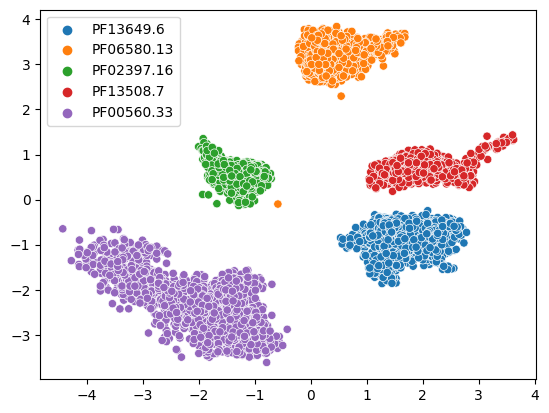

In [ ]:
sns.scatterplot(x=all_data_latent[:, 0], 
                y=all_data_latent[:, 1], 
                hue=np.concatenate([y_train, y_test]));

In [ ]:
log_reg_full.fit(all_data_latent[:X_train.shape[0]], y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('log_reg', LogisticRegression())])

In [ ]:
metrics.f1_score(y_train, log_reg_full.predict(all_data_latent[:X_train.shape[0]]), average="macro")

1.0

In [ ]:
metrics.f1_score(y_test, log_reg_full.predict(all_data_latent[X_train.shape[0]:]), average="macro")

0.9994901148865344

### Сжимаем размерность при помощи AE

In [ ]:
latent_dim = 5
learning_rate = 1e-4 

encoder_seq = Encoder(input_dim=input_dim, 
                      hidden_dims=hidden_dims, 
                      latent_dim=latent_dim)

decoder_seq = Decoder(input_dim=input_dim, 
                      hidden_dims=hidden_dims, 
                      latent_dim=latent_dim)

optimizer = Adam(chain(encoder_seq.parameters(), 
                       decoder_seq.parameters()), 
                 lr=learning_rate)

train(encoder_seq, 
      decoder_seq, 
      train_embeddings_scaled, 
      test_embeddings_scaled, 
      optimizer,
      ae_pass_handler,
      ae_loss_handler,
      n_epochs=200,
      log_interval=10)

Epoch: 0	Train_loss: 1.1760	Test_loss: 1.0168
Epoch: 10	Train_loss: 0.9412	Test_loss: 1.0067
Epoch: 20	Train_loss: 0.7581	Test_loss: 0.8565
Epoch: 30	Train_loss: 0.6360	Test_loss: 0.6550
Epoch: 40	Train_loss: 0.5613	Test_loss: 0.5590
Epoch: 50	Train_loss: 0.5160	Test_loss: 0.5134
Epoch: 60	Train_loss: 0.4851	Test_loss: 0.4832
Epoch: 70	Train_loss: 0.4615	Test_loss: 0.4606
Epoch: 80	Train_loss: 0.4428	Test_loss: 0.4429
Epoch: 90	Train_loss: 0.4276	Test_loss: 0.4285
Epoch: 100	Train_loss: 0.4150	Test_loss: 0.4166
Epoch: 110	Train_loss: 0.4040	Test_loss: 0.4061
Epoch: 120	Train_loss: 0.3942	Test_loss: 0.3967
Epoch: 130	Train_loss: 0.3852	Test_loss: 0.3882
Epoch: 140	Train_loss: 0.3771	Test_loss: 0.3804
Epoch: 150	Train_loss: 0.3696	Test_loss: 0.3733
Epoch: 160	Train_loss: 0.3628	Test_loss: 0.3669
Epoch: 170	Train_loss: 0.3566	Test_loss: 0.3610
Epoch: 180	Train_loss: 0.3508	Test_loss: 0.3557
Epoch: 190	Train_loss: 0.3455	Test_loss: 0.3508
Epoch: 200	Train_loss: 0.3407	Test_loss: 0.3463


In [ ]:
encoder_seq = encoder_seq.eval()
decoder_seq = decoder_seq.eval()

In [ ]:
all_data_scaled = torch.concat([train_embeddings_scaled,
                                test_embeddings_scaled])

In [ ]:
all_data_latent = encoder_seq(all_data_scaled).detach().numpy()

In [ ]:
log_reg_full.fit(all_data_latent[:X_train.shape[0]], y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('log_reg', LogisticRegression())])

In [ ]:
metrics.f1_score(y_train, log_reg_full.predict(all_data_latent[:X_train.shape[0]]), average="macro")

0.9991051463911266

In [ ]:
metrics.f1_score(y_test, log_reg_full.predict(all_data_latent[X_train.shape[0]:]), average="macro")

0.9992124386437885

Кажется, что если поэкспериментировать с архитектурой модели или просто поучить подольше, то в таком случае можно также сильно снизить размерность признакового пространства, что неплохо. Плюс мы могли бы интегрировать классификатор сразу в автоэнкодер.

<font size="6"> Полезные материалы 

<font size="5"> Про unsupervised learning при помощи нейросетей

Главы из учебника Гудфеллоу по теме:
1. [Representation learning](https://www.deeplearningbook.org/contents/representation.html)
2. [Генеративные модели](https://www.deeplearningbook.org/contents/generative_models.html)

Про все увеличивающуюся роль unsupervised learning: 
[Unsupervised Deep Learning - Google DeepMind & Facebook Artificial Intelligence NeurIPS 2018](https://www.youtube.com/watch?v=rjZCjosEFpI)

[Лекция по генеративным моделям](https://www.youtube.com/watch?v=5WoItGTWV54)

Про проклятье размерности: 
1. [В целом](https://medium.com/diogo-menezes-borges/give-me-the-antidote-for-the-curse-of-dimensionality-b14bce4bf4d2)
2. [Для классификации](https://www.visiondummy.com/2014/04/curse-dimensionality-affect-classification/)
3. [Немного другой взгляд](https://towardsdatascience.com/the-curse-of-dimensionality-f07c66128fe1)

<font size="5"> Автоэнкодеры

[Главы из учебника Гудфеллоу по теме](https://www.deeplearningbook.org/contents/autoencoders.html)



[Более подробно про PCA и ссылка на его применение для MNIST](https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60)

[Способы понижения размерности, PCA и разные типы автокодировщиков, лекция Техносферы](https://www.youtube.com/watch?v=W5JLSKcuaQo)

[Eigenfaces](https://ieeexplore.ieee.org/document/139758)

[Конспект от Andrew Ng по разреженным автокодировщикам](https://web.stanford.edu/class/cs294a/sparseAutoencoder.pdf)

Получение разреженного автоэнкодера при помощи:

1. [L1-loss а](https://debuggercafe.com/sparse-autoencoders-using-l1-regularization-with-pytorch/)

2. [KL-divergence](https://debuggercafe.com/sparse-autoencoders-using-kl-divergence-with-pytorch/)

Удаление шума из
1. [изображений](https://debuggercafe.com/autoencoder-neural-network-application-to-image-denoising/)
2. [текста](https://debuggercafe.com/denoising-text-image-documents-using-autoencoders/)

[Введение в автоэнкодеры на kaggle](https://www.kaggle.com/shivamb/how-autoencoders-work-intro-and-usecases)

<font size="5"> Вариационные автоэнкодеры 

[Введение в автоэнкодеры, вариационные автоэнкодеры, PCA](https://towardsdatascience.com/understanding-variational-autoencoders-vaes-f70510919f73)

Введение в автоэнкодеры на Хабрахабре
1. [Введение](https://habr.com/ru/post/331382/)
2. [Manifold learning и скрытые (latent) переменные](https://habr.com/ru/post/331500/)
3. [Вариационные автоэнкодеры (VAE)](https://habr.com/ru/post/331552/)
4. [Conditional VAE](https://habr.com/ru/post/331664/)
5. [GAN(Generative Adversarial Networks)](https://habr.com/ru/post/332000/)
6. [GAN + VAE](https://habr.com/ru/post/332074/)


[Оригинальная статья по VAE](https://arxiv.org/abs/1312.6114)

[Ali Ghodsi, Лекция по VAE](https://www.youtube.com/watch?v=uaaqyVS9-rM)
[Irhum Shafkat, Введение в автоэнкодеры, векторная арифметика](https://towardsdatascience.com/intuitively-understanding-variational-autoencoders-1bfe67eb5daf)

[Jeremy Jordan, введение в автоэнкодеры](https://www.jeremyjordan.me/autoencoders/)

[Jeremy Jordan, вариационные автоэнкодеры](https://www.jeremyjordan.me/variational-autoencoders/)

[Туториал по VAE с arxiv](https://arxiv.org/pdf/1606.05908.pdf)

[Еще одно введение в вариационные автоэнкодеры](https://livebook.manning.com/book/deep-learning-with-python/chapter-8/)

[Туториал по VAE от Google по tensorflow](https://www.tensorflow.org/tutorials/generative/cvae)

[Векторная арифметика в VAE при генерации изображений](https://blog.otoro.net/2016/04/01/generating-large-images-from-latent-vectors/)

[Генерация анимированных персонажей](https://mlexplained.wordpress.com/category/generative-models/vae/)

[Генерация лиц, можно менять пол, заставлять знаменитостей улыбаться](https://towardsdatascience.com/variational-autoencoders-vaes-for-dummies-step-by-step-tutorial-69e6d1c9d8e9)

[VAE на pytorch с пояснениями](https://debuggercafe.com/getting-started-with-variational-autoencoder-using-pytorch/)


[Введение в условные вариационные автоэнкодеры](https://ijdykeman.github.io/ml/2016/12/21/cvae.html)

[Репозиторий с различными модификациями вариационных автоэнкодеров](https://github.com/AntixK/PyTorch-VAE)


Взгляд на VAE как на игру с двумя участниками:
1. [часть 1](https://towardsdatascience.com/the-variational-autoencoder-as-a-two-player-game-part-i-4c3737f0987b)
2. [часть 2](https://towardsdatascience.com/the-variational-autoencoder-as-a-two-player-game-part-ii-b80d48512f46)
3. [часть 3](https://towardsdatascience.com/the-variational-autoencoder-as-a-two-player-game-part-iii-d8d56c301600)


<font size="5"> KL-дивергенция 

[Википедия по дивергенции Кульбака-Лейблера](https://ru.wikipedia.org/wiki/Расстояние_Кульбака_—_Лейблера)
[Мотивация KL-дивергенции](https://math.stackexchange.com/questions/90537/what-is-the-motivation-of-the-kullback-leibler-divergence)

Объяснение проблем и разницы между KL-дивергенцией, дивергенцией Йенсена-Шеннона и расстоянием Вассерштейна:
1. [часть 1, проблемы KL-дивергенции. Дивергенция Йенсена-Шеннона](https://www.youtube.com/watch?v=_z9bdayg8ZI) и 
2. [часть 2, проблемы KL-дивергенции и дивергенции Йенсена-Шеннона. Расстояние Вассерштейна](https://www.youtube.com/watch?v=y8LGAhzCOxQ)


<font size="5"> AAE 

Цикл статей по AAE:
1. [Автоэнкодеры](https://towardsdatascience.com/a-wizards-guide-to-adversarial-autoencoders-part-1-autoencoder-d9a5f8795af4)
2. [Добавление дискриминатора](https://towardsdatascience.com/a-wizards-guide-to-adversarial-autoencoders-part-2-exploring-latent-space-with-adversarial-2d53a6f8a4f9)
3. [Разделение стиля и содержания при помощи AAE](https://towardsdatascience.com/a-wizards-guide-to-adversarial-autoencoders-part-3-disentanglement-of-style-and-content-89262973a4d7)
4. [Semisupervised learning при помощи AAE](https://towardsdatascience.com/a-wizards-guide-to-adversarial-autoencoders-part-4-classify-mnist-using-1000-labels-2ca08071f95)

[Примеры AAE на mlxnet](https://github.com/nicklhy/AdversarialAutoEncoder)

[Здесь в 6 и 8 лекции тоже можно найти примеры](https://github.com/che-shr-cat/deep-learning-for-biology-hse-2019-course)

<font size="5"> Модификации автоэнкодеров

[Contractive Autoencoders](http://www.icml-2011.org/papers/455_icmlpaper.pdf) — автоэнкодеры, родственные шумоподавляющим автокодировщикам.

[Variational losssy autoencoder](https://arxiv.org/pdf/1611.02731.pdf) — один из типов VAE, который пытается решить проблему того, что сильный декодер может игнорировать латентное представление. 

[$\beta$- VAE](https://arxiv.org/pdf/1804.03599.pdf) — еще одно возможное улучшение VAE

[Wassershtein autoencoders](https://arxiv.org/pdf/1711.01558.pdf)

[Concrete autoencoders](https://arxiv.org/abs/1901.09346) — якобы позволяют выделять наиболее важные признаки.

<font size="6"> Примеры практического применения 


1. [Age Progression/Regression — предсказание того, как будет выглядеть человек в другом возрасте](https:/arxiv/abs/1702.08423)

2. [druGAN, генерация новых химических веществ](https://pubs.acs.org/doi/10.1021/acs.molpharmaceut.7b00346)

3. [Генерация лекарств, специфически меняющих активность генов человека](https://www.frontiersin.org/articles/10.3389/fphar.2020.00269/full)

4. [Генерация ингибиторов определенного белка](https://www.nature.com/articles/s41587-019-0224-x)

5. [Получение латентных представлений транскриптомов](https://academic.oup.com/nar/article/48/10/e56/5814052)

6. [MethylNet](https://bmcbioinformatics.biomedcentral.com/articles/10.1186/s12859-020-3443-8) — Использование метилирования генома для обучения латентного представления, помогающего в предсказании возраста и т.д

7. [scVAE](https://academic.oup.com/bioinformatics/article-abstract/36/16/4415/5838187?redirectedFrom=fulltext) — получение данных об экспрессии генов из single cell данных

8. [U-Net](https://arxiv.org/abs/1505.04597) — сегментация медицинских изображений
9. [W-Net](https://arxiv.org/abs/1711.08506) — unsupervised сегментация медицинских изображений  